In [33]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from contextlib import contextmanager
@contextmanager
def ignore_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield

from numba.core.errors import NumbaDeprecationWarning
warnings.filterwarnings('ignore', category=NumbaDeprecationWarning)
import scanpy as sc
import anndata as ad
import mudata as md
import muon as mu
# import pyranges as pr
from tqdm import tqdm

In [34]:
from matplotlib import rcParams


In [35]:
from stwg_grn_params import *

In [36]:
l1_colors = {
'ATL': '#1f77b4',
  'PT_VCAM1': '#c5b0d5',
 'CNT': '#ff7f0e',
 'DCT': '#279e68',
  'DCT1': '#279e68',
 'DCT2': '#ffb500',
 'DTL': '#d62728',
  'CCD-IC-A': '#ff4a46',
 'IC-B': '#1b4400',
 'aPT': '#c0b9b2',
 'EC': '#aa40fc',
 'ENDO': '#aa40fc',
 'FIB': '#8c564b',
 'IC': '#e377c2',
 'ICA': '#e377c2',
 'ica': '#e377c2',
 'icb': '#7b4f4b',
 'ICB': '#7b4f4b',
 'IMM': '#b5bd61',
 'LEUK': '#b5bd61',
 'NEU': '#17becf',
 'TL': '#ffb500',
 'PC': '#aec7e8',
 'pc': '#aec7e8',
 'PEC': '#17becf',
 'POD': '#98df8a',
 'PODO': '#98df8a',
'PT': '#ff9896',
 'PapE': '#c5b0d5',
 'TAL': '#c49c94',
'MES': '#f7b6d2',
 'VSM/P': '#f7b6d2',
 'VSM': '#f7b6d2',
 'Unclassified':'#d3d3d3'}
batch_color={
  "scRNA3p" : '#1f77b4',
  "scRNA5p" : '#ff7f0e',
  'snRNA' : '#2ca02c',
  'snMultiome' : '#F6E873'}

In [37]:
cell_order = ['PT','aPT','TAL', 'PC', 'CNT', 'DCT','ICA','ICB','PEC', 'PODO','ENDO', 'FIB','MES','LEUK']
cell_order_new = ['PT','aPT','TAL', 'PC', 'CNT', 'DCT','CCD-IC-A','IC-B','PEC', 'POD','EC', 'FIB','VSM/P','IMM']
name_mapper = {i:j for i,j in zip(cell_order,cell_order_new)}

In [38]:
batch_mapper = {"scRNA" : 'scRNA3p',
  "scRNA5p" : 'scRNA5p',
  'snRNA' : 'snRNA',
  'snMultiome' : 'snMultiome'}

In [39]:
len(cell_order)

14

In [40]:
mdata = mu.read(MDATA_PATH)
mdata

/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/macera/.conda/envs/scanpy_basic/lib/python3.9/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


MuData object with n_obs × n_vars = 42464 × 190515
  obs:	'sample', 'barcode', 'batch', 'celltype'
  2 modalities
    rna:	40529 x 38224
      obs:	'sample', 'barcode', 'batch', 'celltype'
      var:	'seqname', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute', 'gene_id', 'gene_type', 'havana_gene', 'hgnc_id', 'tag'
      layers:	'counts'
    atac:	12703 x 152291
      obs:	'sample', 'barcode', 'batch', 'celltype'
      var:	'gene_ids', 'feature_types', 'genome', 'interval', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'dispersions', 'dispersions_norm', 'Chromosome', 'Start', 'End'
      layers:	'counts'

In [41]:
celltype_scores = pd.read_pickle(f'{OUTPUT_DIR}/scores.pickle')
grns = pd.read_pickle(f'{OUTPUT_DIR}/grns.pickle')

In [42]:
celltype_order = cell_order_new
platform_order = mdata[GEX].obs[PLATFORM].unique()

In [43]:
celltype_colors= [l1_colors[i] for i in cell_order_new]

In [44]:

# figure size in inches
rcParams['figure.figsize'] = 12,6


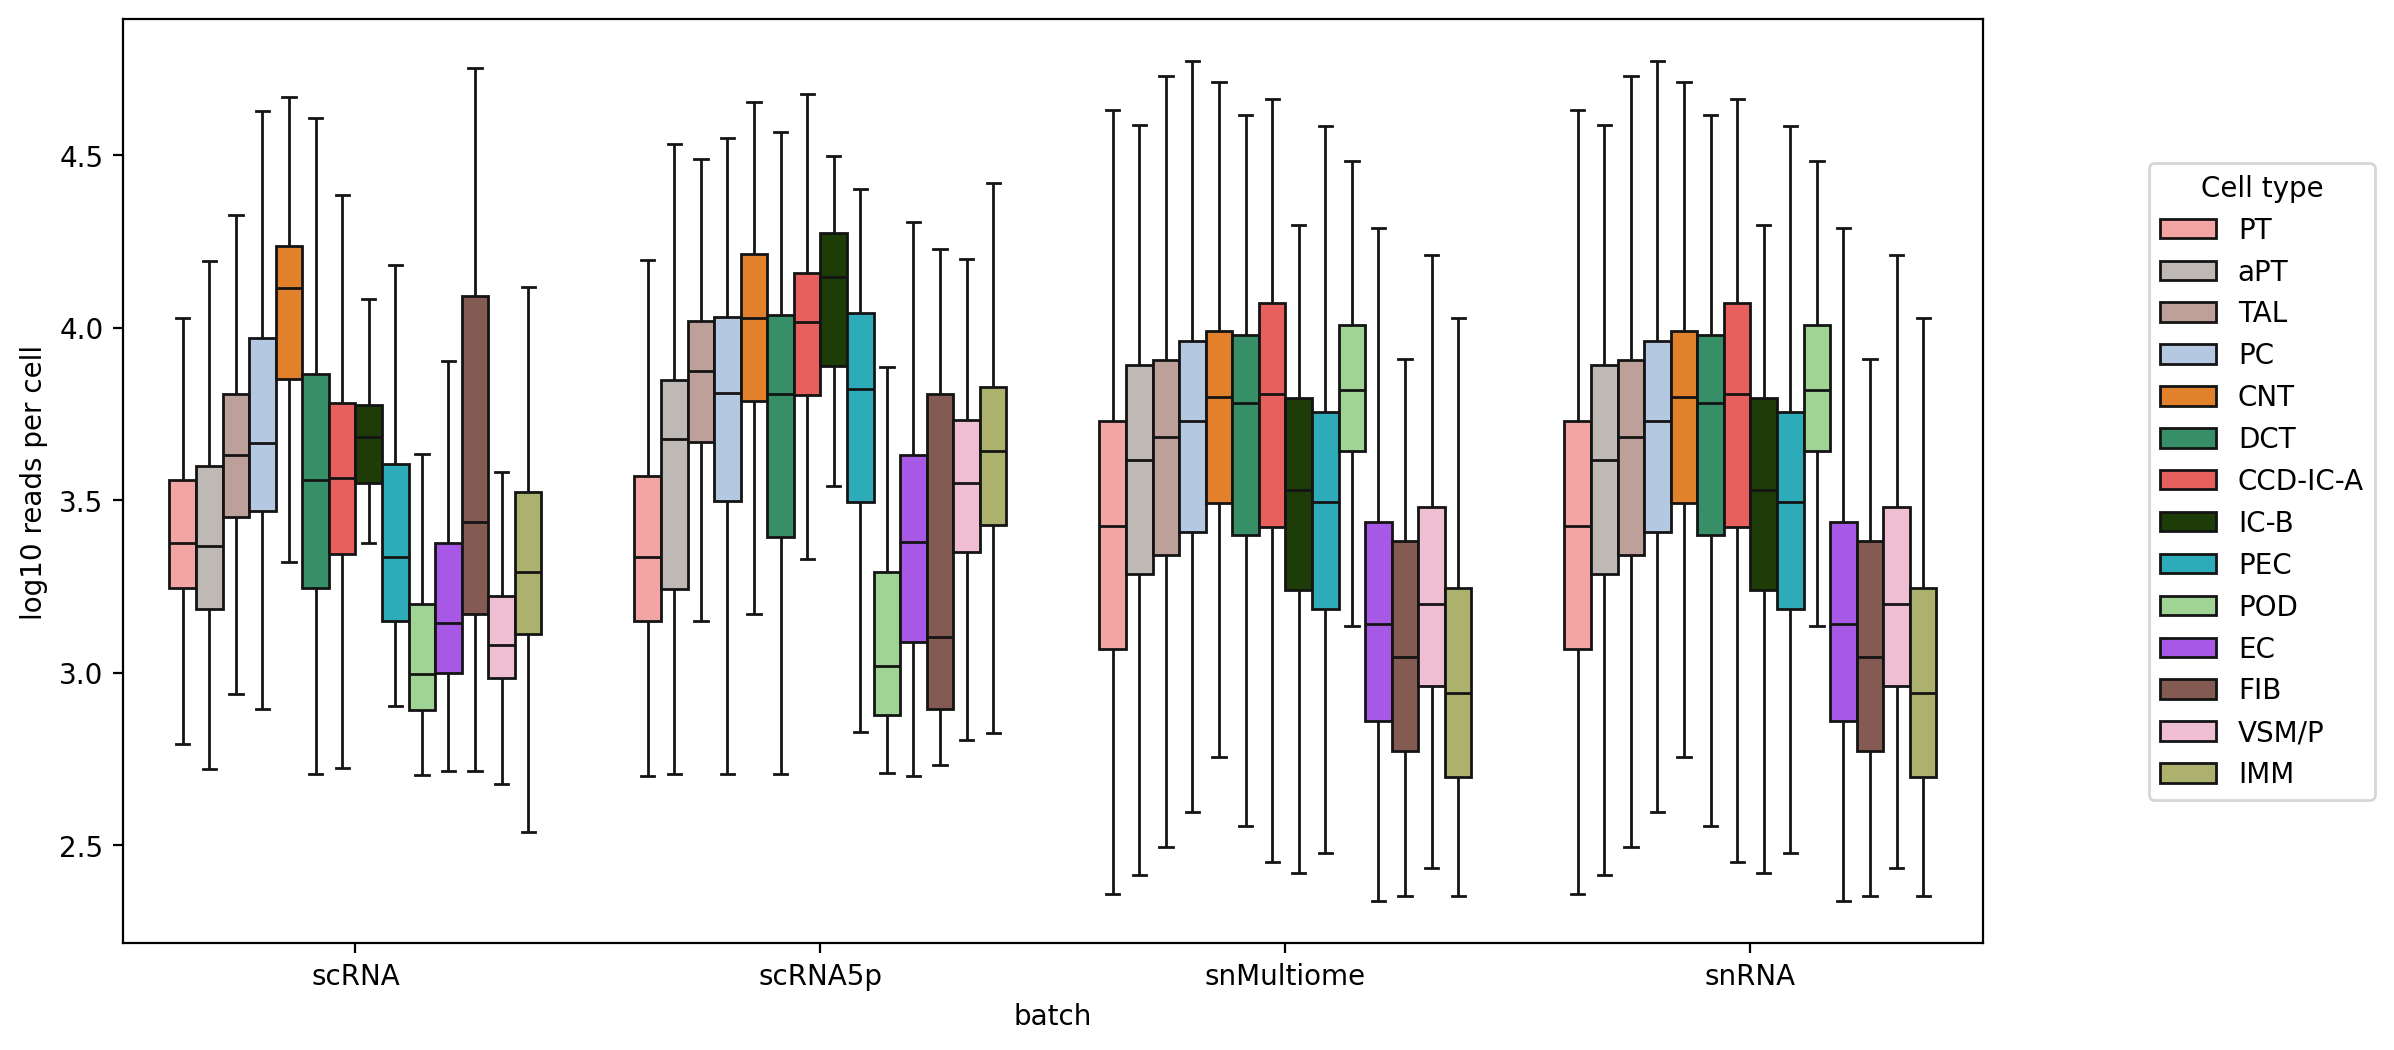

In [45]:
mdata[GEX].obs['num_reads'] = mdata[GEX].X.sum(1).A1
mdata[GEX].obs['log10_num_reads'] = np.log10(1+mdata[GEX].obs['num_reads'])
df = mdata[GEX].obs.copy()
df['celltype'] = df['celltype'].cat.reorder_categories(cell_order)
df['celltype'] = df['celltype'].cat.rename_categories(cell_order_new)
sns.boxplot(data=df, x='batch', y='log10_num_reads', hue='celltype', palette=l1_colors, hue_order=cell_order_new, showfliers=False)
plt.ylabel('log10 reads per cell')
plt.legend(loc='center',bbox_to_anchor=(1.15,0.5), title='Cell type')

In [46]:
celltype_colors

['#ff9896',
 '#c0b9b2',
 '#c49c94',
 '#aec7e8',
 '#ff7f0e',
 '#279e68',
 '#ff4a46',
 '#1b4400',
 '#17becf',
 '#98df8a',
 '#aa40fc',
 '#8c564b',
 '#f7b6d2',
 '#b5bd61']

In [47]:
mdata[GEX].obs[[PLATFORM,CELLTYPE]].value_counts().unstack()

celltype,CNT,DCT,ENDO,FIB,ICA,ICB,LEUK,MES,PC,PEC,PODO,PT,TAL,aPT
batch,,,,,,,,,,,,,,
scRNA,131,243,740,64,111,33,756,223,116,71,44,1444,251,166
scRNA5p,225,240,538,24,362,43,994,157,413,42,72,2519,706,81
snMultiome,777,1397,1096,173,730,420,247,178,1255,200,283,4679,2216,1209
snRNA,777,1397,1096,173,730,420,247,178,1255,200,283,4679,2216,1209


Text(995.6527777777777, 0.5, 'Platform')

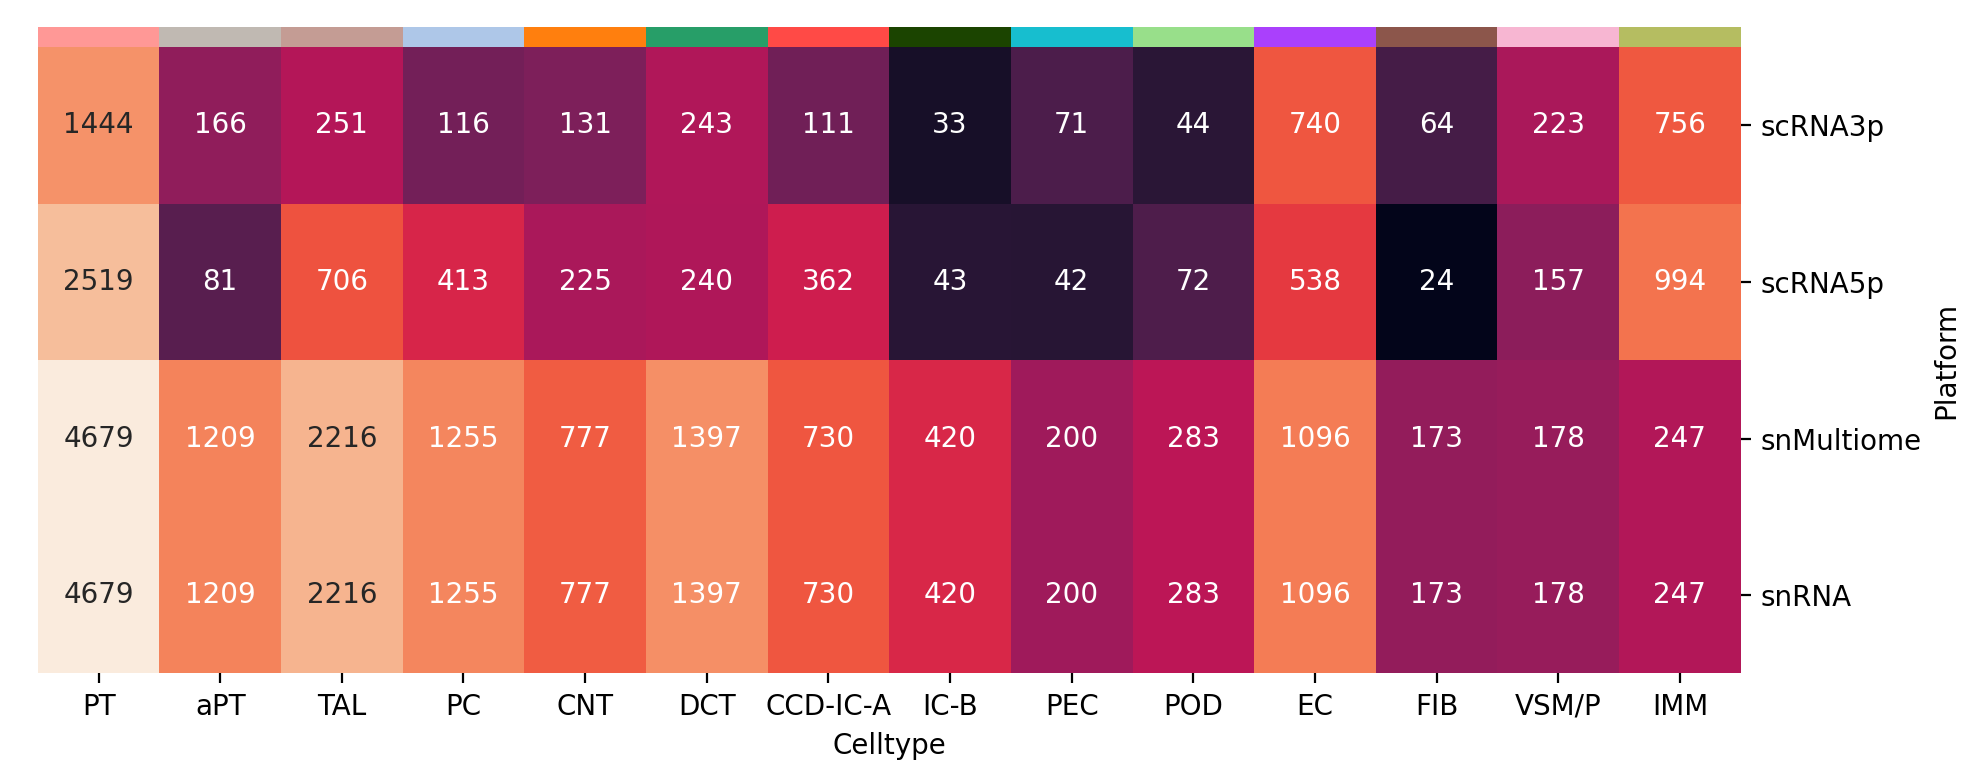

In [48]:
df = mdata[GEX].obs[[PLATFORM,CELLTYPE]].value_counts().unstack()
df = df.rename(index=batch_mapper)
df = df.rename(columns=name_mapper)
df = df[cell_order_new]
celltype_colors= [l1_colors[i] for i in cell_order_new]
col_colors = [celltype_colors[i] for i in range(len(df.columns))]
sns.clustermap(np.log10(1+df), annot=df, fmt='d', col_colors=col_colors, cbar_pos=None,
               dendrogram_ratio=0.01, col_cluster=False, row_cluster=False, figsize=(10,4))
plt.xlabel('Celltype')
plt.ylabel('Platform')

# Predictive power out-of-sample

In [49]:
celltype_order = cell_order_new

In [50]:
rcParams['figure.figsize'] = 12,6

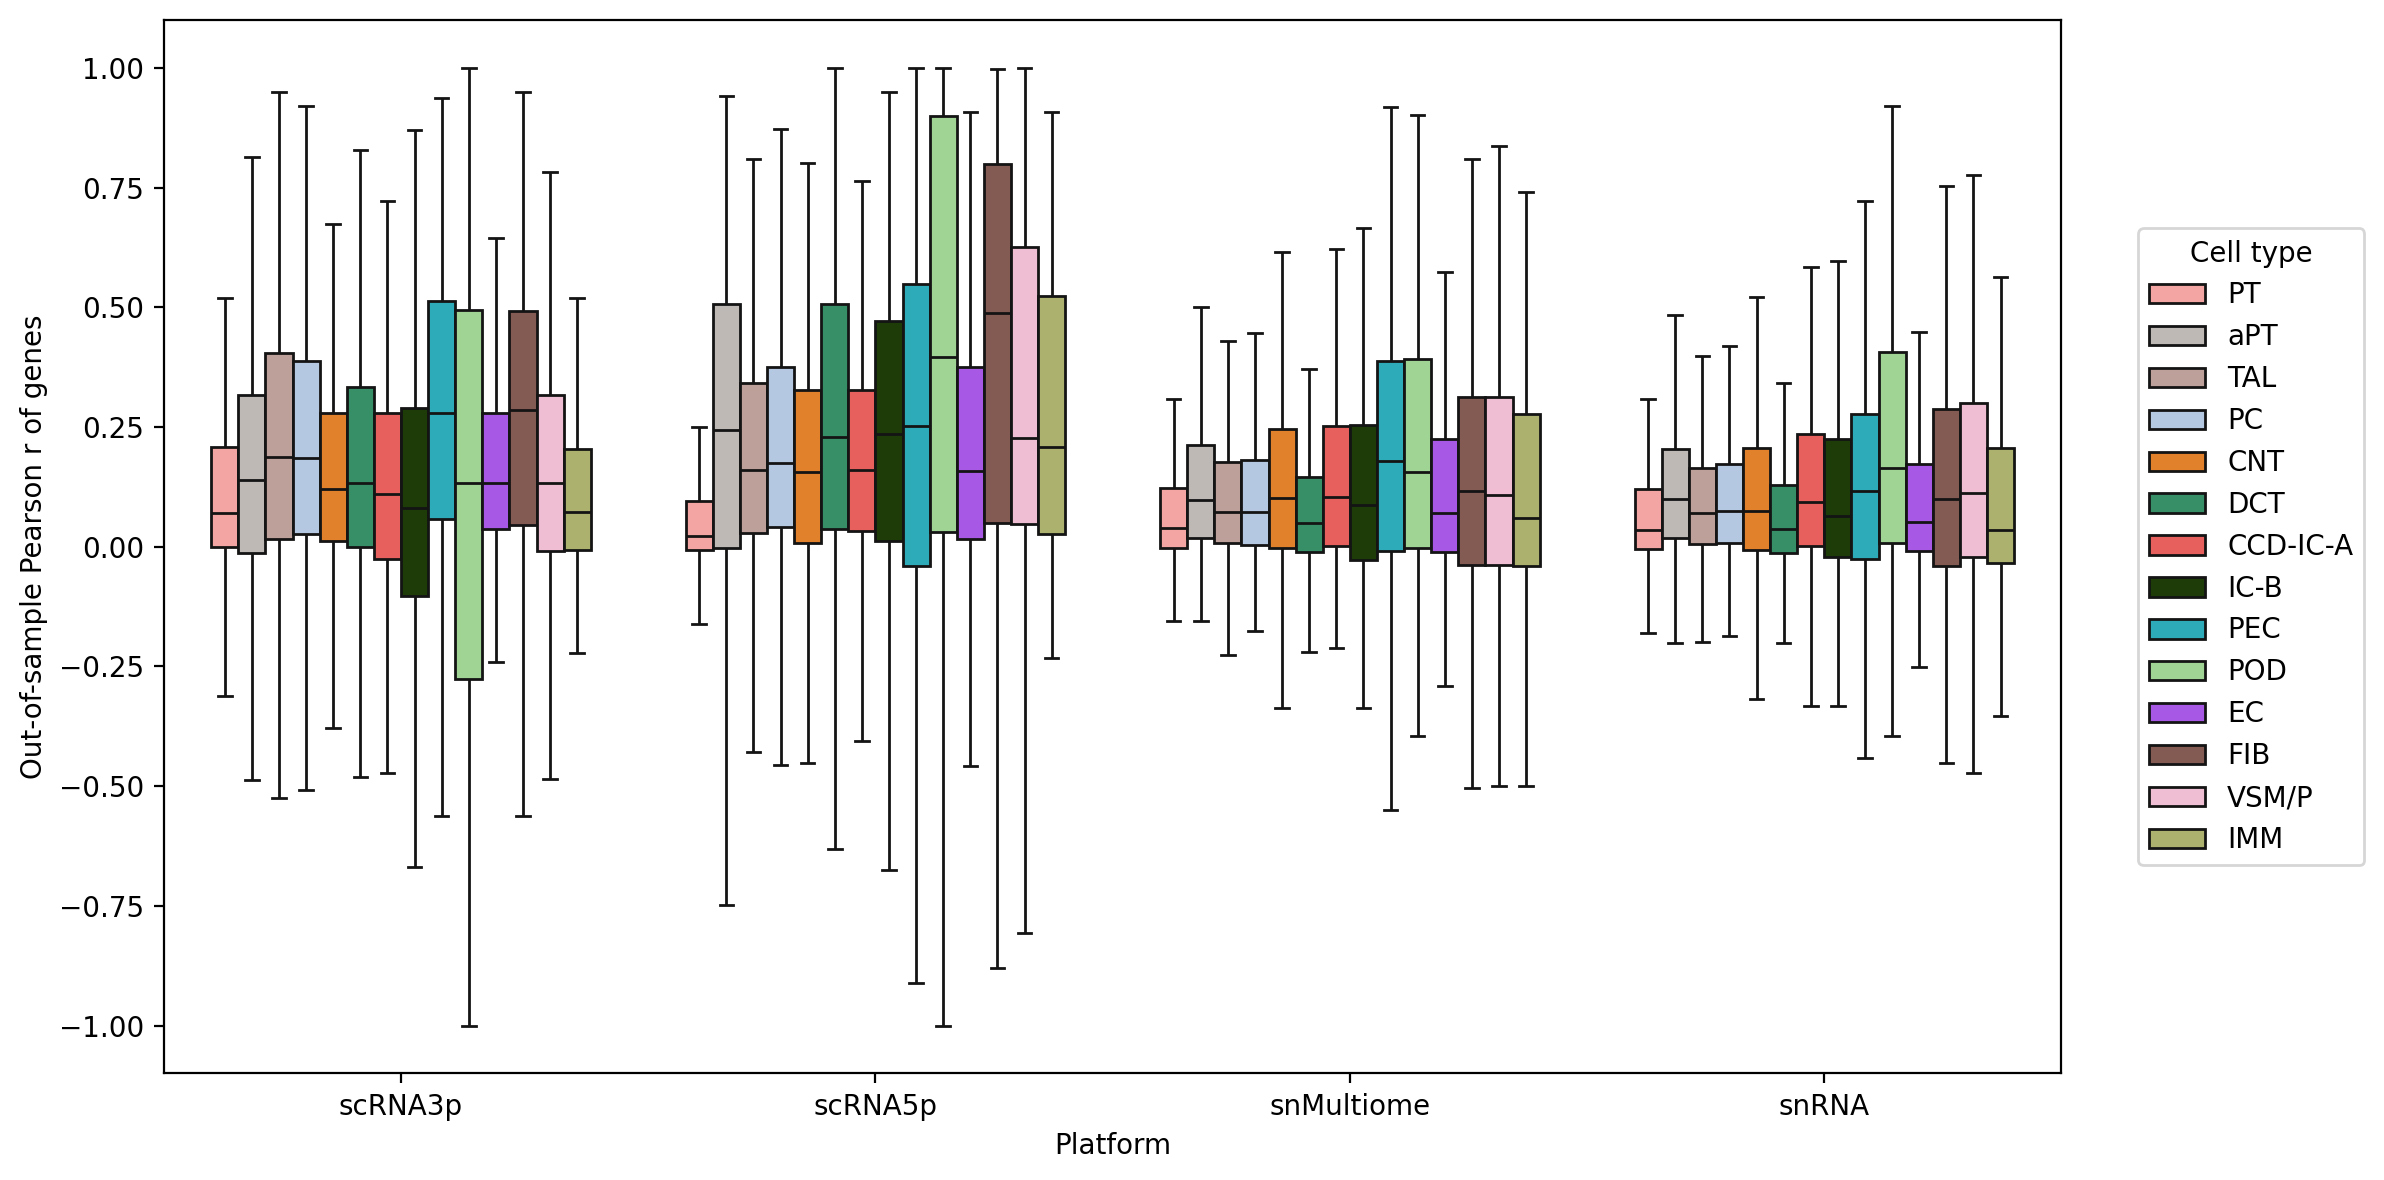

In [51]:
from scipy.stats import wilcoxon, ttest_rel, ttest_ind
from statsmodels.stats.multitest import multipletests
import joblib

df = celltype_scores.melt(ignore_index=False)
df = df.reset_index().dropna()
df['train'] = df['train'].str[0]  # only one sample per train set now
df = df.query('train != test')

num_cells = mdata[GEX].obs[[PLATFORM,CELLTYPE]].value_counts()
df['celltype'] = df['celltype'].astype('category')
df['batch'] = df['batch'].astype('category')

df['celltype'] = df['celltype'].cat.reorder_categories(cell_order)
df['celltype'] = df['celltype'].cat.rename_categories(cell_order_new)
df['batch'] = df['batch'].cat.rename_categories(batch_mapper)
# plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='batch', y='value', hue='celltype', palette=l1_colors, hue_order=celltype_order, showfliers=False)
plt.ylabel('Out-of-sample Pearson r of genes')
plt.xlabel('Platform')
plt.legend(loc='center',bbox_to_anchor=(1.1,0.5),title='Cell type')
plt.tight_layout()
plt.savefig('../figures/fig1a.pdf')
plt.savefig('../figures/fig1a.jpg')

/tmp/ipykernel_45745/2331305205.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df, x='batch', y='value', palette=batch_color, cut=0, linewidth=1)


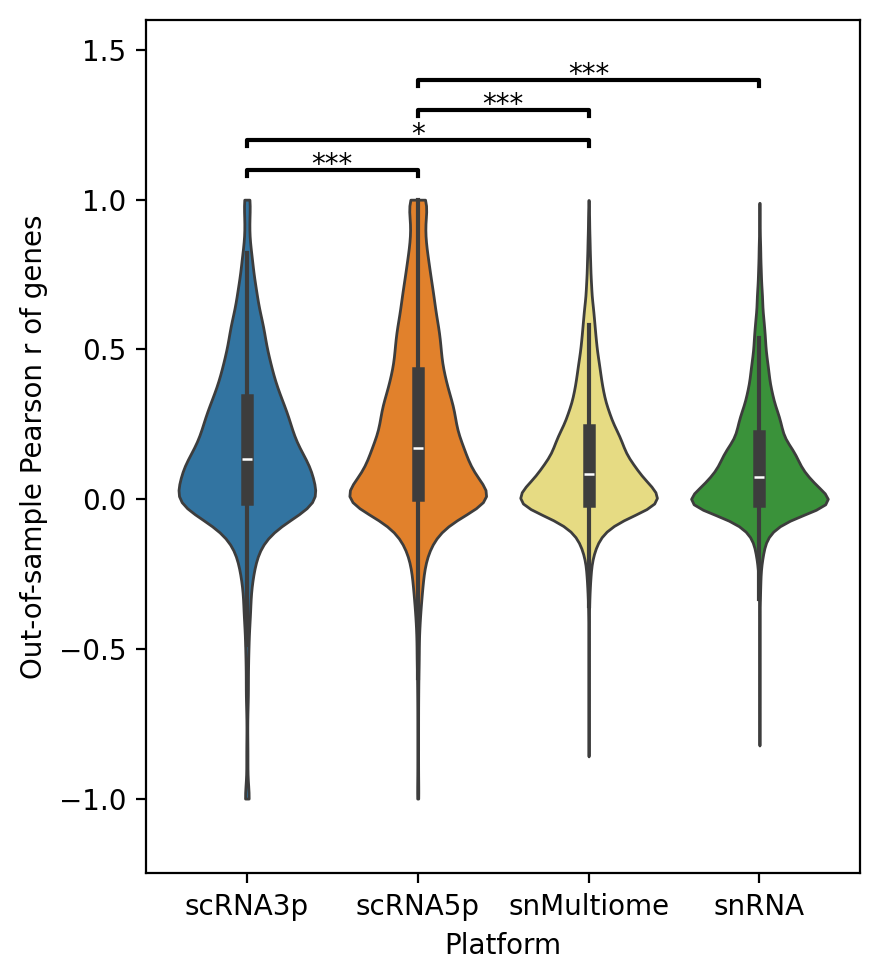

In [52]:
from scipy.stats import ttest_ind
import itertools as it
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4.5,5))
ax = sns.violinplot(data=df, x='batch', y='value', palette=batch_color, cut=0, linewidth=1)
plt.ylabel('Out-of-sample Pearson r of genes')
plt.ylim([-1.25, 1.5])
plt.xlabel('Platform')

# Perform pairwise t-tests and store results
result = {}
for (a, b) in it.combinations(df['batch'].unique(), 2):
    df_a = df.query(f'batch == "{a}"')
    df_b = df.query(f'batch == "{b}"')
    df_ab = df_a.merge(df_b, how='inner', on=['train', 'test', 'celltype', 'variable'])
    t_stat, p_val = ttest_ind(df_ab['value_x'], df_ab['value_y'])
    result[(a, b)] = p_val

# Adding statistical significance annotations based on p-values
y_pos = 1.1  # Starting position for annotations
for (a, b), p_val in result.items():
    x1, x2 = sorted([df['batch'].unique().tolist().index(a), df['batch'].unique().tolist().index(b)])
    if p_val < 0.05:
        text = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*'
        plt.plot([x1, x1, x2, x2], [y_pos - 0.02, y_pos, y_pos, y_pos - 0.02], color='black')
        plt.text((x1 + x2) * 0.5, y_pos - 0.03, text, ha='center', va='bottom')
        y_pos += 0.1  # Increment y position for the next annotation

plt.ylim(-1.25, y_pos + 0.1)  # Extend ylim to fit all annotations
# plt.show()
plt.tight_layout()
plt.savefig('../figures/fig1b.pdf')
plt.savefig('../figures/fig1b.jpg')

# Number of reproduced active TFs per celltype x platform

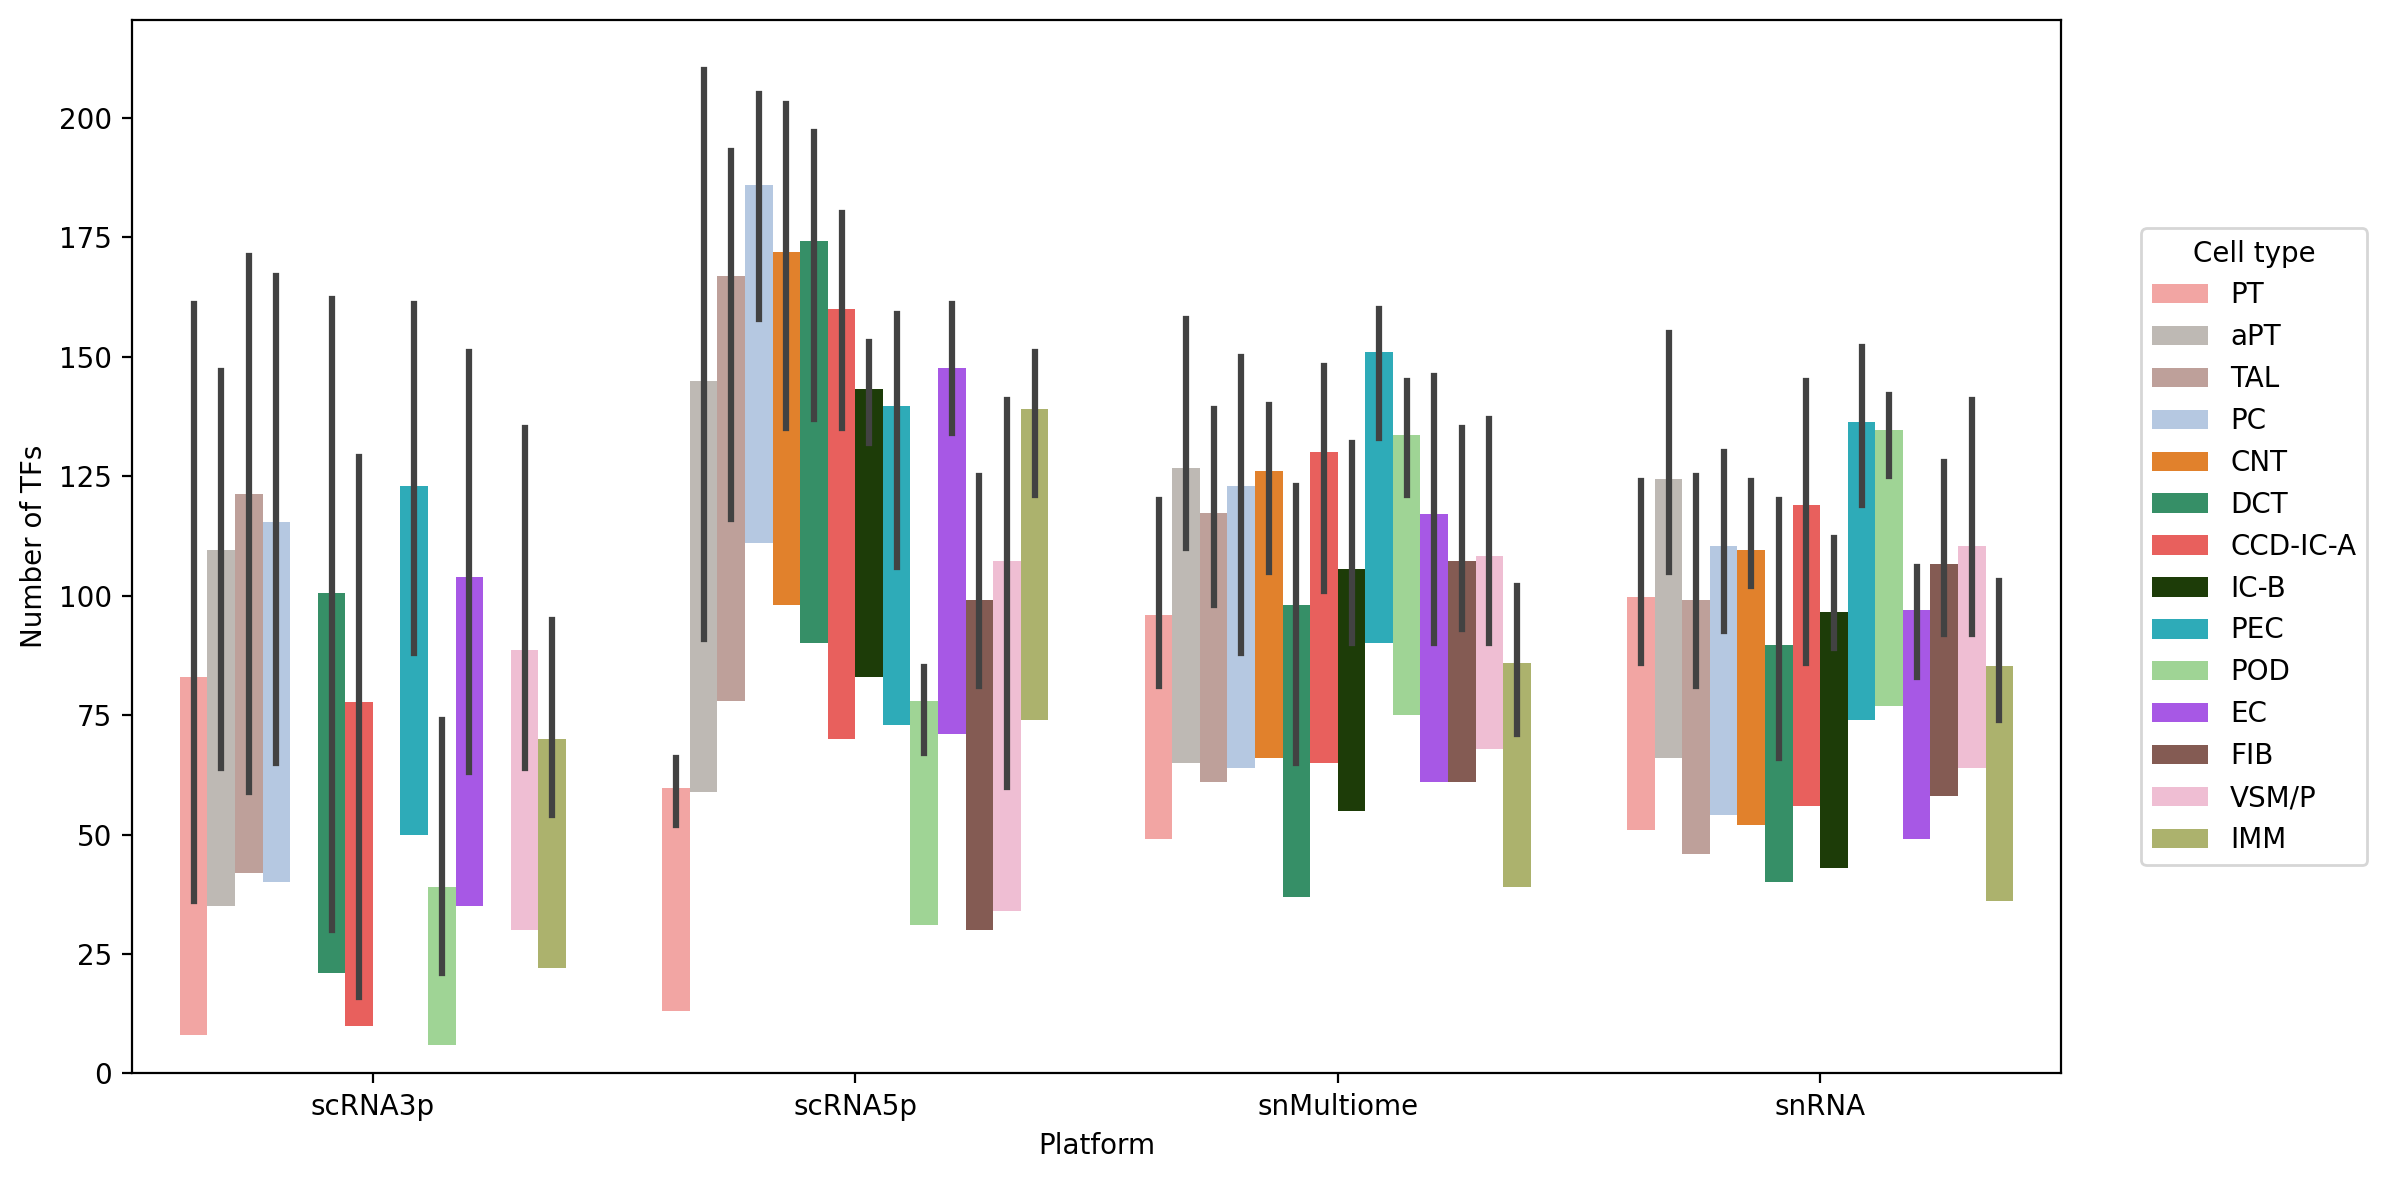

In [53]:
_grns = (
    grns
    .melt(ignore_index=False, var_name='celltype', value_name='r')
    .query(f'abs(r)>{CORRELATION_THRESHOLD}')
    .reset_index()
)
_grns['train'] = _grns['train'].str[0]

_sample_num_links = _grns.groupby(['batch','train','celltype'])['tf'].nunique().rename('count').reset_index()
_mean_num_links = _sample_num_links.groupby(['batch','celltype'])['count'].mean().to_frame()

_all_samples_num_links = _grns.groupby(['batch','celltype','tf'])['train'].nunique()
_all_samples_num_links = _all_samples_num_links[_all_samples_num_links == _grns['train'].nunique()].reset_index()
_all_samples_num_links = _all_samples_num_links[['batch','celltype']].value_counts().to_frame()

_df = _sample_num_links.merge(_all_samples_num_links, on=['batch','celltype']).reset_index()

_df['celltype'] = _df['celltype'].astype('category')
_df['batch'] = _df['batch'].astype('category')

# df['celltype'] = df['celltype'].cat.reorder_categories(cell_order)
_df['celltype'] = _df['celltype'].cat.rename_categories(name_mapper)
_df['batch'] = _df['batch'].cat.rename_categories(batch_mapper)

sns.barplot(data=_df, x='batch', y='count_x', hue='celltype', 
            hue_order=celltype_order, palette=l1_colors)
sns.barplot(data=_df, x='batch', y='count_y', hue='celltype', 
            hue_order=celltype_order, palette= ["#FFFFFF" for _ in celltype_order], legend=False)
plt.legend(loc='center',bbox_to_anchor=(1.1,0.5), title='Cell type')
plt.xlabel('Platform')
plt.ylabel('Number of TFs')
plt.tight_layout()
plt.savefig('../figures/fig2a.pdf')
plt.savefig('../figures/fig2a.png')

/tmp/ipykernel_45745/1382641034.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df, x='batch', y='count', palette=batch_color, linewidth=1, cut=0)


5.859349734704768e-05
1.1547034729806759e-07
2.8727880977624326e-07
0.054254203951739674
0.17047066837831862
0.28553391386368343


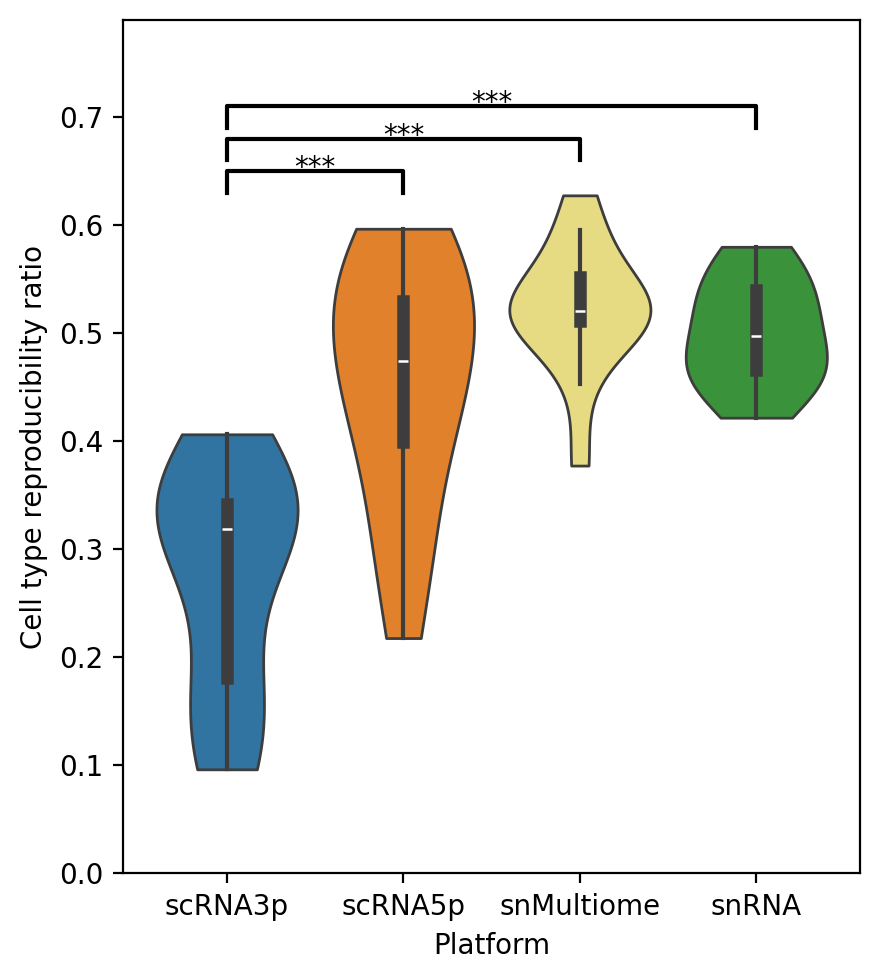

In [54]:
from scipy.stats import ttest_ind
import itertools as it
import matplotlib.pyplot as plt
import seaborn as sns

# Process data
df = _all_samples_num_links.squeeze() / _sample_num_links.groupby(['batch', 'celltype'])['count'].mean()
df = df.reset_index()
df['batch'] = df['batch'].astype('category')
df['celltype'] = list(df['celltype'])

df['batch'] = df['batch'].cat.rename_categories(batch_mapper)

plt.figure(figsize=(4.5, 5))
ax = sns.violinplot(data=df, x='batch', y='count', palette=batch_color, linewidth=1, cut=0)
plt.ylabel('Cell type reproducibility ratio')
plt.xlabel('Platform')

# Perform pairwise t-tests and store results
result = {}
for (a, b) in it.combinations(df['batch'].unique(), 2):
    df_a = df.query(f'batch == "{a}"')
    df_b = df.query(f'batch == "{b}"')
    df_ab = df_a.merge(df_b, how='outer', on=['celltype'])
    df_ab['count_x'] = df_ab['count_x'].fillna(0)
    t_stat, p_val = ttest_ind(df_ab['count_x'], df_ab['count_y'])
    print(p_val)
    result[(a, b)] = p_val

# Add statistical significance annotations based on p-values
y_pos = 0.65  # Starting position for annotations
for (a, b), p_val in result.items():
    x1, x2 = sorted([df['batch'].unique().tolist().index(a), df['batch'].unique().tolist().index(b)])
    if p_val < 0.05:
        text = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*'
        plt.plot([x1, x1, x2, x2], [y_pos - 0.02, y_pos, y_pos, y_pos - 0.02], color='black')
        plt.text((x1 + x2) * 0.5, y_pos - 0.01, text, ha='center', va='bottom')
        y_pos += 0.03  # Increment y position for the next annotation

plt.ylim(0, y_pos + 0.05)  # Extend ylim to fit all annotations
# plt.show()
plt.tight_layout()
plt.savefig('../figures/fig2b.pdf')
plt.savefig('../figures/fig2b.png')

<Figure size 1700x1500 with 0 Axes>

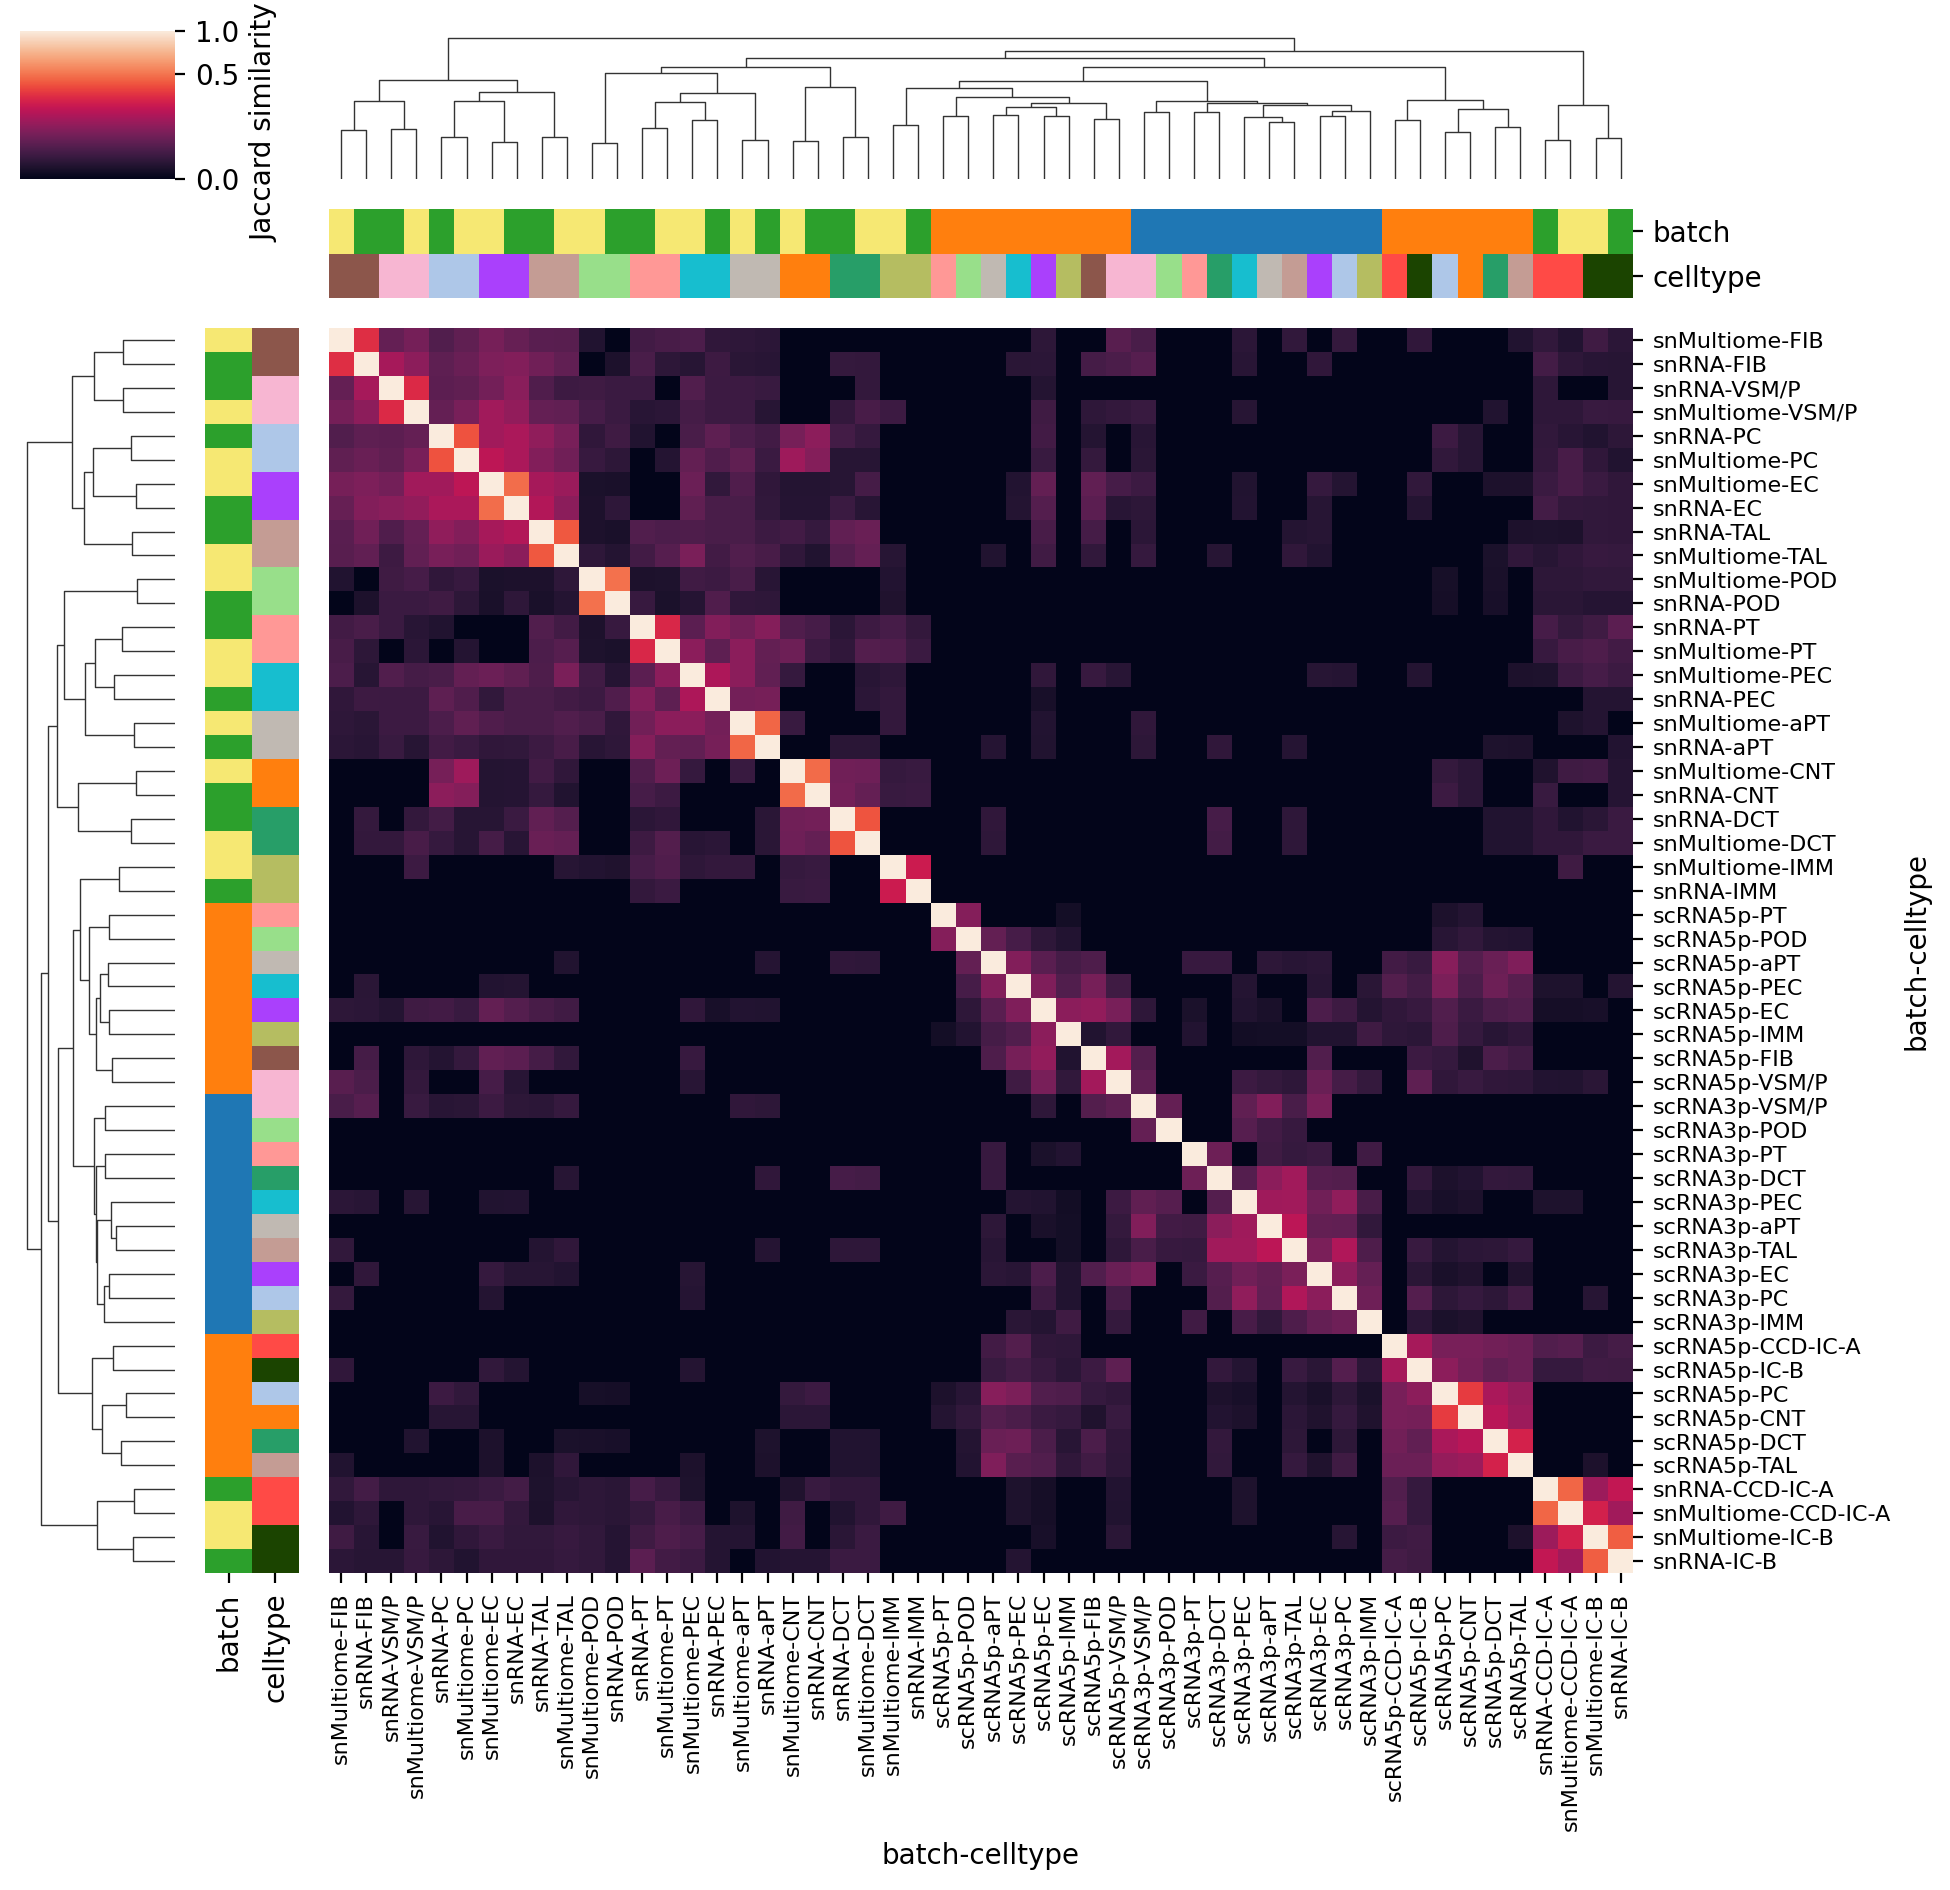

In [55]:
from sklearn.metrics import pairwise_distances
import scipy.cluster.hierarchy as sch
import matplotlib.colors as mcolors

_consensus_grns = _grns.groupby(['batch','celltype','tf','target'])['train'].nunique()
_consensus_grns = _consensus_grns[_consensus_grns == _grns['train'].nunique()]
_consensus_grns = _consensus_grns.reset_index().pivot(index=['batch','celltype'],columns=['tf','target'])['train'] > 0

sim = pd.DataFrame(1 - pairwise_distances(_consensus_grns.values, _consensus_grns.values, metric='jaccard'))
sim.index = sim.columns = _consensus_grns.index

# Compute linkage using optimal ordering
sim = sim.rename(index=batch_mapper, level=0).rename(index=name_mapper, level=1)
sim = sim.rename(columns=batch_mapper, level=0).rename(columns=name_mapper, level=1)

linkage = sch.linkage(sim, method='ward', optimal_ordering=True)


colors = sim.index.to_frame()
colors['batch'] = [batch_color[i] for i in colors['batch']]
colors['celltype'] = [l1_colors[i] for i in colors['celltype']]
plt.figure(figsize=(17, 15))

# Create the clustermap with the precomputed linkage
g = sns.clustermap(sim, row_linkage=linkage, col_linkage=linkage, norm=mcolors.PowerNorm(gamma=0.5),
               xticklabels=1, yticklabels=1, row_colors=colors, col_colors=colors,
               cbar_kws={'label': 'Jaccard similarity    '},
               cbar_pos=(0.0, 1, 0.02, 0.03), dendrogram_ratio=0.1)
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), fontsize=8)  # Set x tick font size
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), fontsize=8) 
plt.tight_layout()
plt.savefig('../figures/fig3a.pdf', bbox_inches='tight')
plt.savefig('../figures/fig3a.jpg', bbox_inches='tight')

In [56]:
import pandas as pd
import scipy.stats as stats

# Step 1: Aggregate to (cell type, TF) level
_consensus_tfs = _grns.groupby(['batch', 'celltype', 'tf'])['train'].nunique()
_consensus_tfs = _consensus_tfs[_consensus_tfs == _grns['train'].nunique()]
_consensus_tfs = _consensus_tfs.reset_index().pivot(index='batch', columns=['celltype','tf'], values='train').fillna(0) > 0
_consensus_tfs

celltype      DCT                                                              \
tf          CEBPD   EGR1   ELF1   EMX2 ESRRG   ETS2    FOS  FOSL2 FOXP1 HIF1A   
batch                                                                           
scRNA        True   True   True   True  True   True   True   True  True  True   
scRNA5p      True   True  False   True  True   True   True   True  True  True   
snMultiome  False  False  False  False  True  False  False  False  True  True   
snRNA       False  False  False  False  True  False  False  False  True  True   

celltype    ...    TAL    aPT                                            \
tf          ...  NR6A1    AHR   ATF6    EHF  ESRRB  GRHL2 MLXIPL NFATC3   
batch       ...                                                           
scRNA       ...  False  False  False  False  False  False  False  False   
scRNA5p     ...  False  False  False  False  False  False  False  False   
snMultiome  ...  False  False  False  False  False  False  False  False   
snRNA       ...   True   True   True   True   True   True   True   True   

celltype                  
tf          PPARA  SMAD2  
batch                     
scRNA       False  False  
scRNA5p     False  False  
snMultiome  False  False  
snRNA        True   True  

[4 rows x 1545 columns]

In [57]:
import pandas as pd
import scipy.stats as stats
import itertools

# Assuming `_consensus_tfs` is already defined as per your setup

# Function to compute Fisher's Exact Test between two rows
def fisher_test_rows(row1, row2):
    # Construct a contingency table
    both = ((row1 & row2).sum())
    only_row1 = ((row1 & ~row2).sum())
    only_row2 = ((~row1 & row2).sum())
    neither = ((~row1 & ~row2).sum())
    
    table = [[both, only_row1], [only_row2, neither]]
    
    # Run Fisher's Exact Test
    odds_ratio, p_value = stats.fisher_exact(table)
    return odds_ratio, p_value

# Initialize a DataFrame to store results
fisher_results = []

# Iterate over each unique pair of rows (platforms)
for (platform1, platform2) in itertools.combinations(_consensus_tfs.index, 2):
    odds_ratio, p_value = fisher_test_rows(_consensus_tfs.loc[platform1], _consensus_tfs.loc[platform2])
    fisher_results.append({
        'Platform1': platform1,
        'Platform2': platform2,
        'Odds Ratio': odds_ratio,
        'P-Value': p_value
    })

# Convert results into a DataFrame for easy viewing
fisher_results_df = pd.DataFrame(fisher_results)

# Display results
print(fisher_results_df)

    Platform1   Platform2  Odds Ratio        P-Value
0       scRNA     scRNA5p    2.300669   2.047764e-09
1       scRNA  snMultiome    0.497549   9.351269e-08
2       scRNA       snRNA    0.644313   7.983045e-04
3     scRNA5p  snMultiome    0.167960   3.246195e-57
4     scRNA5p       snRNA    0.289983   2.774613e-31
5  snMultiome       snRNA   13.669355  8.524955e-117


In [58]:
fisher_results_df['Platform1'] = fisher_results_df['Platform1'].map(batch_mapper)
fisher_results_df['Platform2'] = fisher_results_df['Platform2'].map(batch_mapper)

In [59]:
rcParams['figure.figsize'] = 6,6

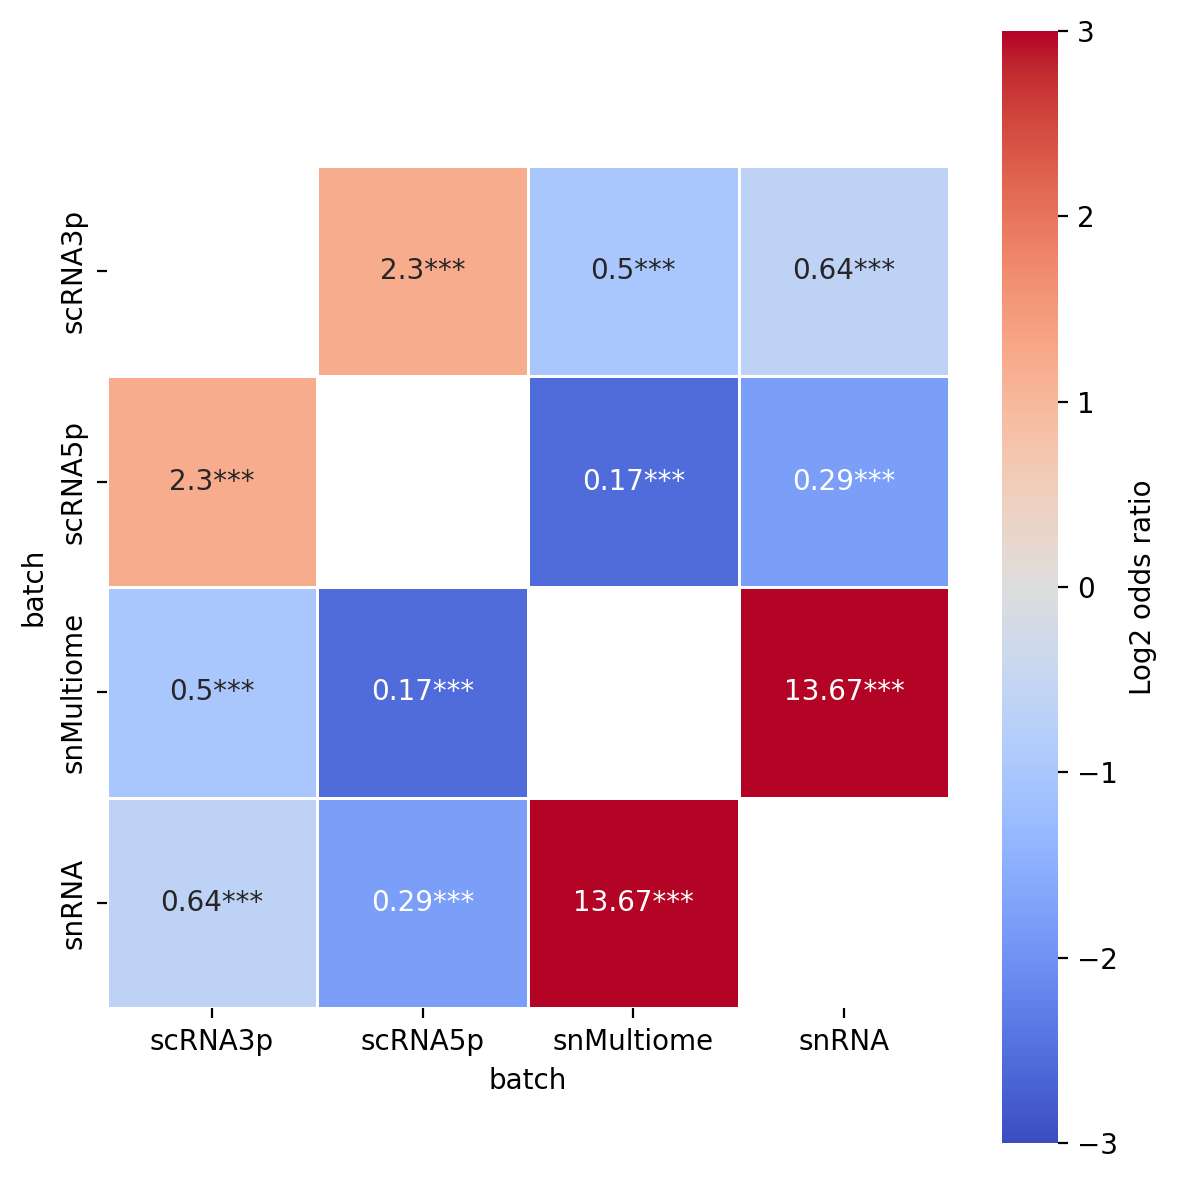

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Pivot the results DataFrame to create matrix format for the heatmap
odds_ratio_matrix = fisher_results_df.pivot(index='Platform1', columns='Platform2', values='Odds Ratio')
p_value_matrix = fisher_results_df.pivot(index='Platform1', columns='Platform2', values='P-Value')

# Fill matrices symmetrically
odds_ratio_matrix = odds_ratio_matrix.combine_first(odds_ratio_matrix.T)
p_value_matrix = p_value_matrix.combine_first(p_value_matrix.T)

# Create a DataFrame for annotations with odds ratios and significance asterisks
annot_matrix = odds_ratio_matrix.round(2).astype(str)  # Start with rounded odds ratios as strings
annot_matrix += p_value_matrix.map(lambda p: "***" if p < 0.001 else ("**" if p < 0.01 else ("*" if p < 0.05 else "")))

odds_ratio_matrix.index.name = 'batch'
odds_ratio_matrix.columns.name = 'batch'

# Initialize the heatmap plot
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(np.log2(odds_ratio_matrix), annot=annot_matrix, fmt="", cmap="coolwarm", 
                      cbar_kws={'label': 'Log2 odds ratio'}, vmin=-3, vmax=3, linewidths=0.5, square=True)

# Final touches
# plt.title("Fisher's Exact Test Odds Ratios with Significance Annotations")
# plt.xticks(rotation=45, ha='right')
# plt.yticks(rotation=0)
plt.tight_layout()
# plt.show()

plt.tight_layout()
plt.savefig('../figures/fig3c.pdf')
plt.savefig('../figures/fig3c.jpg')

In [61]:
pd.DataFrame(index=_consensus_tfs.index, columns=_consensus_tfs.index)

batch,scRNA,scRNA5p,snMultiome,snRNA
batch,,,,
scRNA,NaN,NaN,NaN,NaN
scRNA5p,NaN,NaN,NaN,NaN
snMultiome,NaN,NaN,NaN,NaN
snRNA,NaN,NaN,NaN,NaN


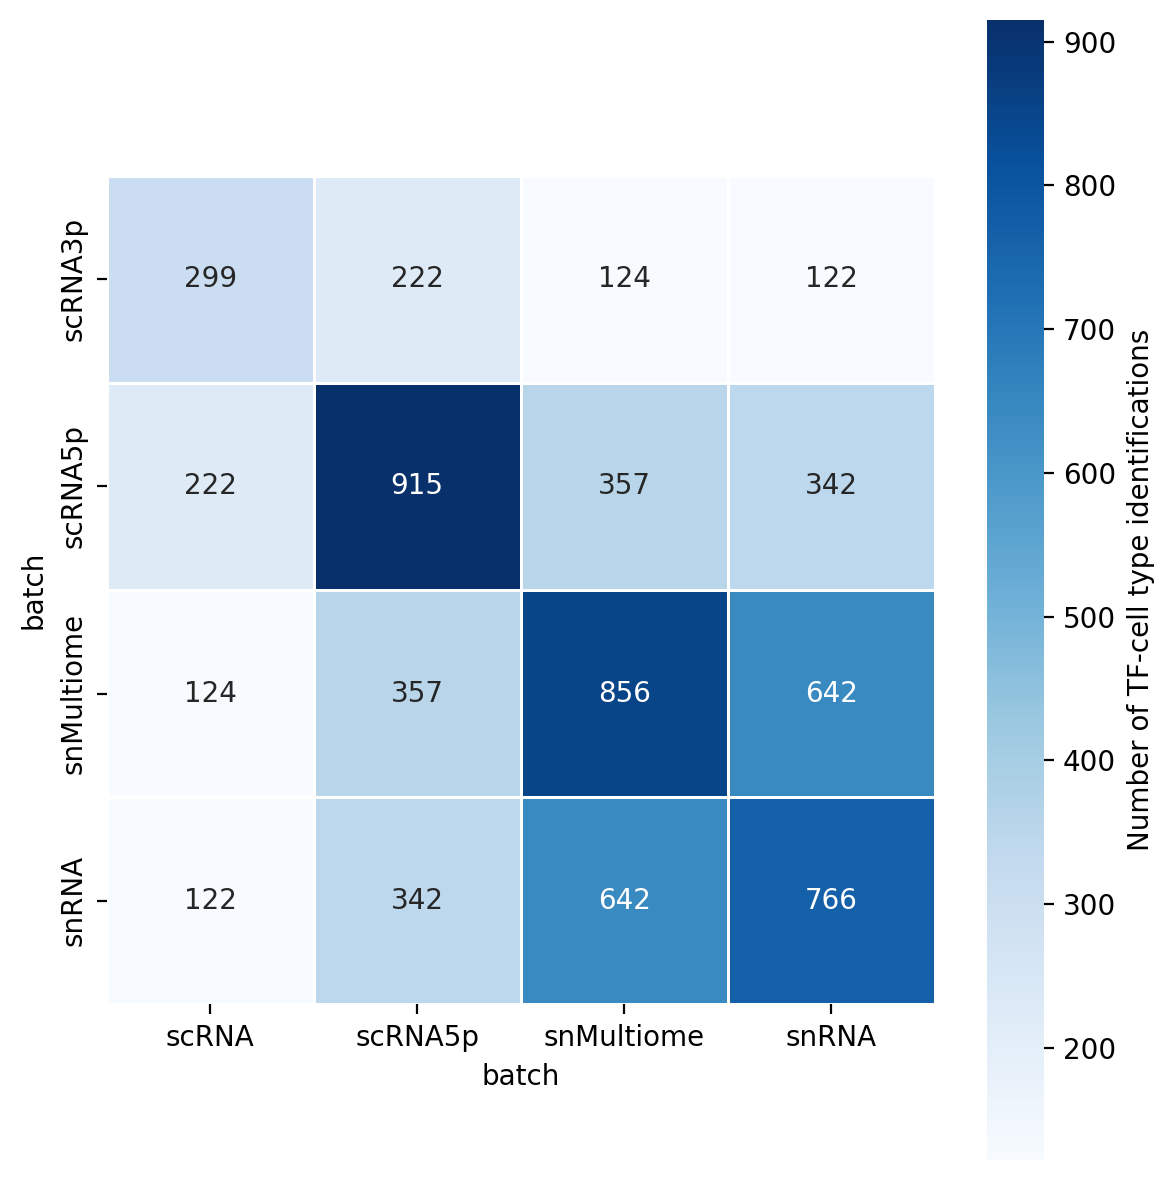

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to compute intersection sizes between pairs of platforms
def intersection_size(row1, row2):
    return (row1 & row2).sum()

# Initialize an empty DataFrame to store intersection sizes
intersection_matrix = pd.DataFrame(index=_consensus_tfs.index, columns=_consensus_tfs.index)
# Calculate intersection sizes for each pair (including diagonal)
for platform1 in _consensus_tfs.index:
    for platform2 in _consensus_tfs.index:
        intersection_matrix.loc[platform1, platform2] = intersection_size(_consensus_tfs.loc[platform1], _consensus_tfs.loc[platform2])

# Convert to integers (currently objects due to being assigned cell-by-cell)
intersection_matrix = intersection_matrix.astype(int)
intersection_matrix.index = intersection_matrix.index.map(batch_mapper)

# Create the heatmap with intersection sizes annotated
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(intersection_matrix, annot=True, fmt="d", cmap="Blues", 
                      cbar_kws={'label': 'Number of TF-cell type identifications'}, linewidths=0.5, square=True)

# Final touches
plt.tight_layout()
# plt.show()

plt.savefig('../figures/fig3b.pdf')
plt.savefig('../figures/fig3b.jpg')

# HPA TF precision

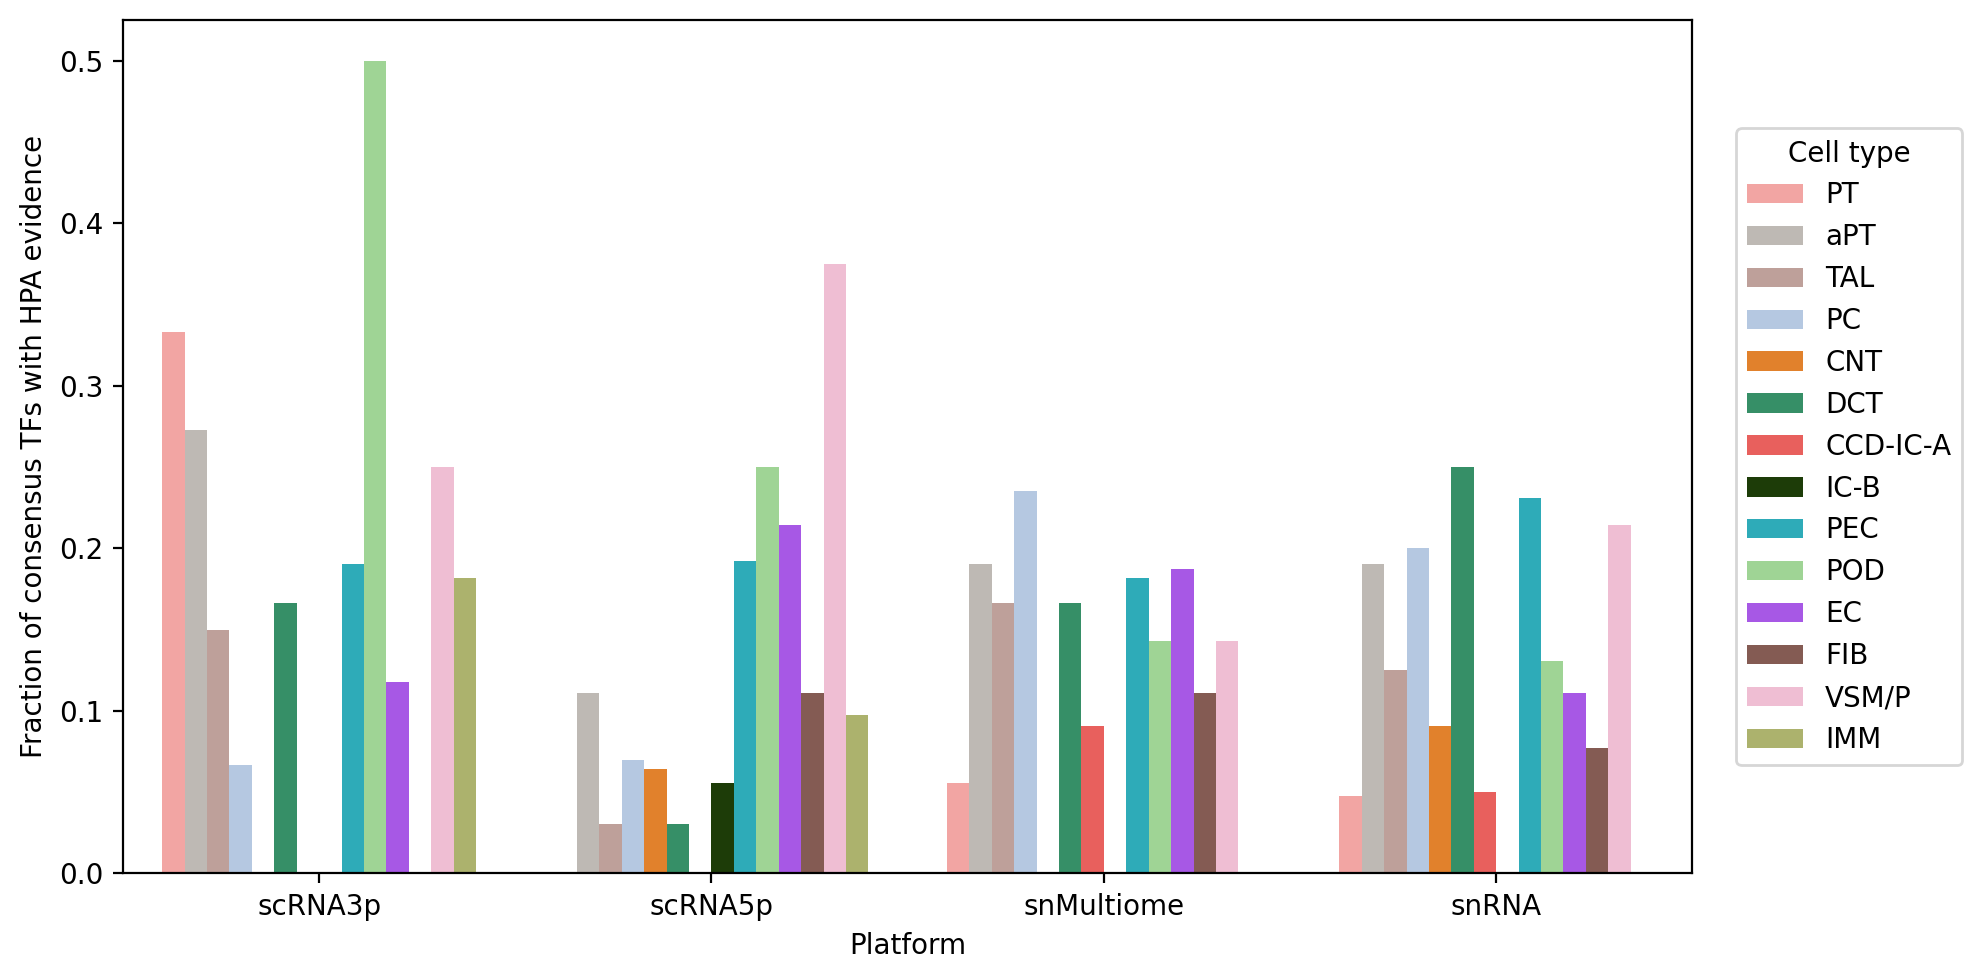

In [70]:
jaspar_tfs = !grep -oP '^>MA\d+\.\d+\t(.*)$' {JASPAR_PATH} | cut -f2
jaspar_tfs = set('::'.join(jaspar_tfs).upper().split('::'))

hpa_tfs = pd.read_pickle(HPA_PATH)
hpa_tfs = hpa_tfs[hpa_tfs['nuclear']>0][[]]
hpa_tfs.index.name = 'tf'
hpa_tfs = hpa_tfs[hpa_tfs.index.isin(jaspar_tfs)]

robust_tfs = _consensus_grns.melt(ignore_index=False).reset_index().query('value')
num_robust_tfs = robust_tfs.groupby(['batch','celltype'])['tf'].nunique()
robust_in_hpa = robust_tfs.join(hpa_tfs,how='inner',on='tf')
num_robust_in_hpa = robust_in_hpa.groupby(['batch','celltype'])['tf'].nunique()
df = (num_robust_in_hpa / num_robust_tfs).reset_index()
plt.figure(figsize=(10,5))
df['batch'] = df['batch'].map(batch_mapper)
df['celltype'] = df['celltype'].map(name_mapper)
sns.barplot(data=df,
            x='batch',
            y='tf',
            hue='celltype',
            hue_order=celltype_order,
            palette=l1_colors)
plt.legend(loc='center',bbox_to_anchor=(1.1,0.5), title='Cell type')
plt.xlabel('Platform')
plt.ylabel('Fraction of consensus TFs with HPA evidence')

plt.tight_layout()
plt.savefig('../figures/fig4a.pdf')
plt.savefig('../figures/fig4a.jpg')


In [71]:
df_ = pd.DataFrame(num_robust_tfs)
df_ = df_['tf'].unstack('celltype')
df_ = df_.fillna(0)
df_['sum'] = df_.sum(axis=1)
df_.index = df_.index.map(batch_mapper)

/tmp/ipykernel_45745/686616560.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df, x='batch', y='tf', palette=batch_color, linewidth=1, cut=0)


0.36592643336409614
0.37948877687988225
0.42612115412577123
0.8896941786364052
0.8225015091750665
0.9159148416971119


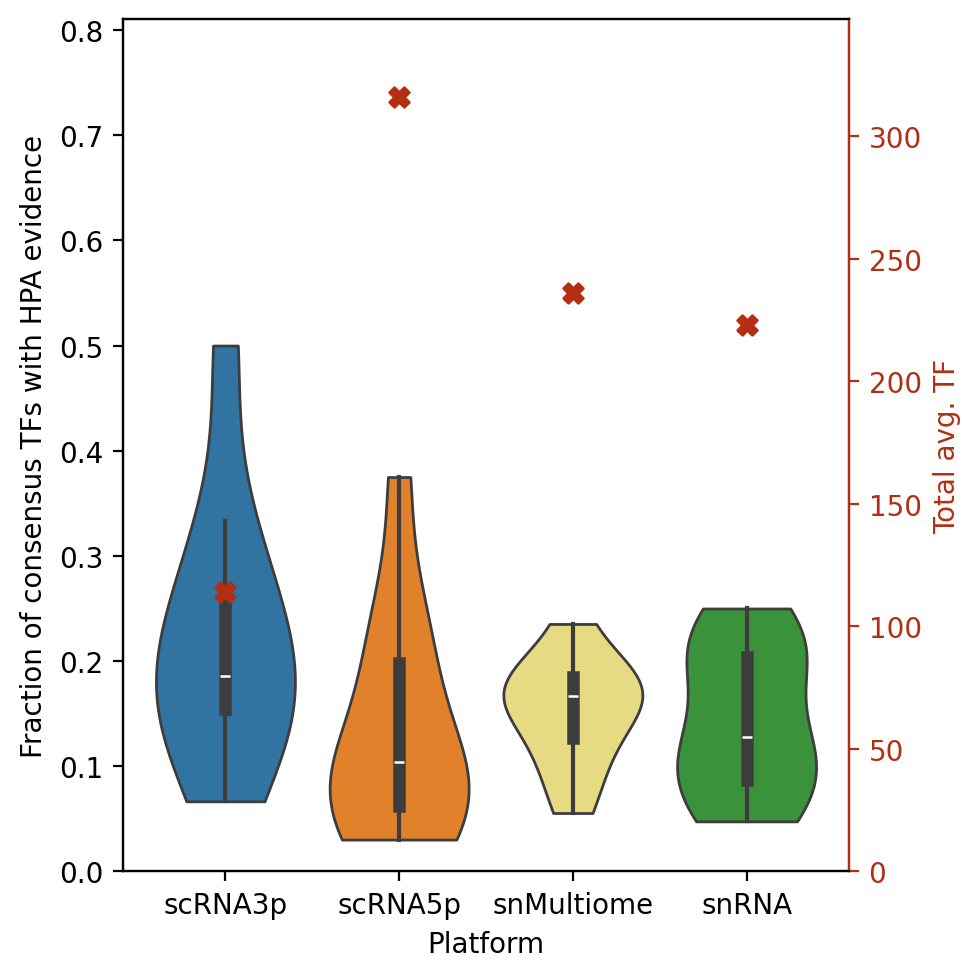

In [74]:
from scipy.stats import ttest_ind
import itertools as it
import matplotlib.pyplot as plt
import seaborn as sns

total_tfs = dict(df_['sum'])
plt.figure(figsize=(5, 5))
ax = sns.violinplot(data=df, x='batch', y='tf', palette=batch_color, linewidth=1, cut=0)
plt.ylabel('Fraction of consensus TFs with HPA evidence')
plt.ylim([0, 1.1])  # Adjusted to fit annotations
plt.xlabel('Platform')

# Perform pairwise t-tests and store results
result = {}
for (a, b) in it.combinations(df['batch'].unique(), 2):
    df_a = df.query(f'batch == "{a}"')
    df_b = df.query(f'batch == "{b}"')
    df_ab = df_a.merge(df_b, how='outer', on=['celltype'])
    df_ab['tf_x'] = df_ab['tf_x'].fillna(0)
    df_ab['tf_y'] = df_ab['tf_y'].fillna(0)
    t_stat, p_val = ttest_ind(df_ab['tf_x'], df_ab['tf_y'])
    result[(a, b)] = p_val
    print(p_val)
# Add statistical significance annotations based on p-values
y_pos = 0.8  # Starting position for annotations
for (a, b), p_val in result.items():
    x1, x2 = sorted([df['batch'].unique().tolist().index(a), df['batch'].unique().tolist().index(b)])
    if p_val < 0.05:
        text = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*'
        plt.plot([x1, x1, x2, x2], [y_pos - 0.001, y_pos, y_pos, y_pos - 0.001], color='black')
        plt.text((x1 + x2) * 0.5, y_pos + 0.001, text, ha='center', va='bottom')
        y_pos += 0.005  # Increment y position for the next annotation

plt.ylim(0, y_pos + 0.01)  # Extend ylim to fit all annotations
# plt.show()

# ax.set_ylim(0, y_pos + 0.01)  # Extend ylim to fit all annotations
secondary_axis_color='#B22F13'
# Add secondary y-axis for total TF counts
ax2 = ax.twinx()
ax2.set_ylim(0, max(total_tfs.values()) * 1.1)  # Scale secondary axis
ax2.tick_params(axis='y', colors=secondary_axis_color)  # Set tick color
ax2.spines['right'].set_color(secondary_axis_color)  # Set axis spine color
ax2.set_ylabel('Total avg. TF',color=secondary_axis_color)

# Add symbols for total TF counts
for i, batch in enumerate(df['batch'].unique()):
    tf_count = total_tfs[batch]
    ax2.scatter(i,tf_count, color=secondary_axis_color, s=50, zorder=3, marker='X',label=None)  # Symbol for total TF count
    # ax.text(i, 0.067, f"{tf_count}", color=secondary_axis_color, ha='center', va='bottom', fontsize=10)  # Annotation

plt.tight_layout()
plt.savefig('../figures/fig4b.pdf')
plt.savefig('../figures/fig4b.jpg')

# ChipSeq promoter edge precision

In [66]:
df

,batch,celltype,tf
0,scRNA3p,DCT,0.166667
1,scRNA3p,EC,0.117647
2,scRNA3p,IMM,0.181818
3,scRNA3p,VSM/P,0.250000
4,scRNA3p,PC,0.066667
5,scRNA3p,PEC,0.190476
6,scRNA3p,POD,0.500000
7,scRNA3p,PT,0.333333
8,scRNA3p,TAL,0.150000
9,scRNA3p,aPT,0.272727


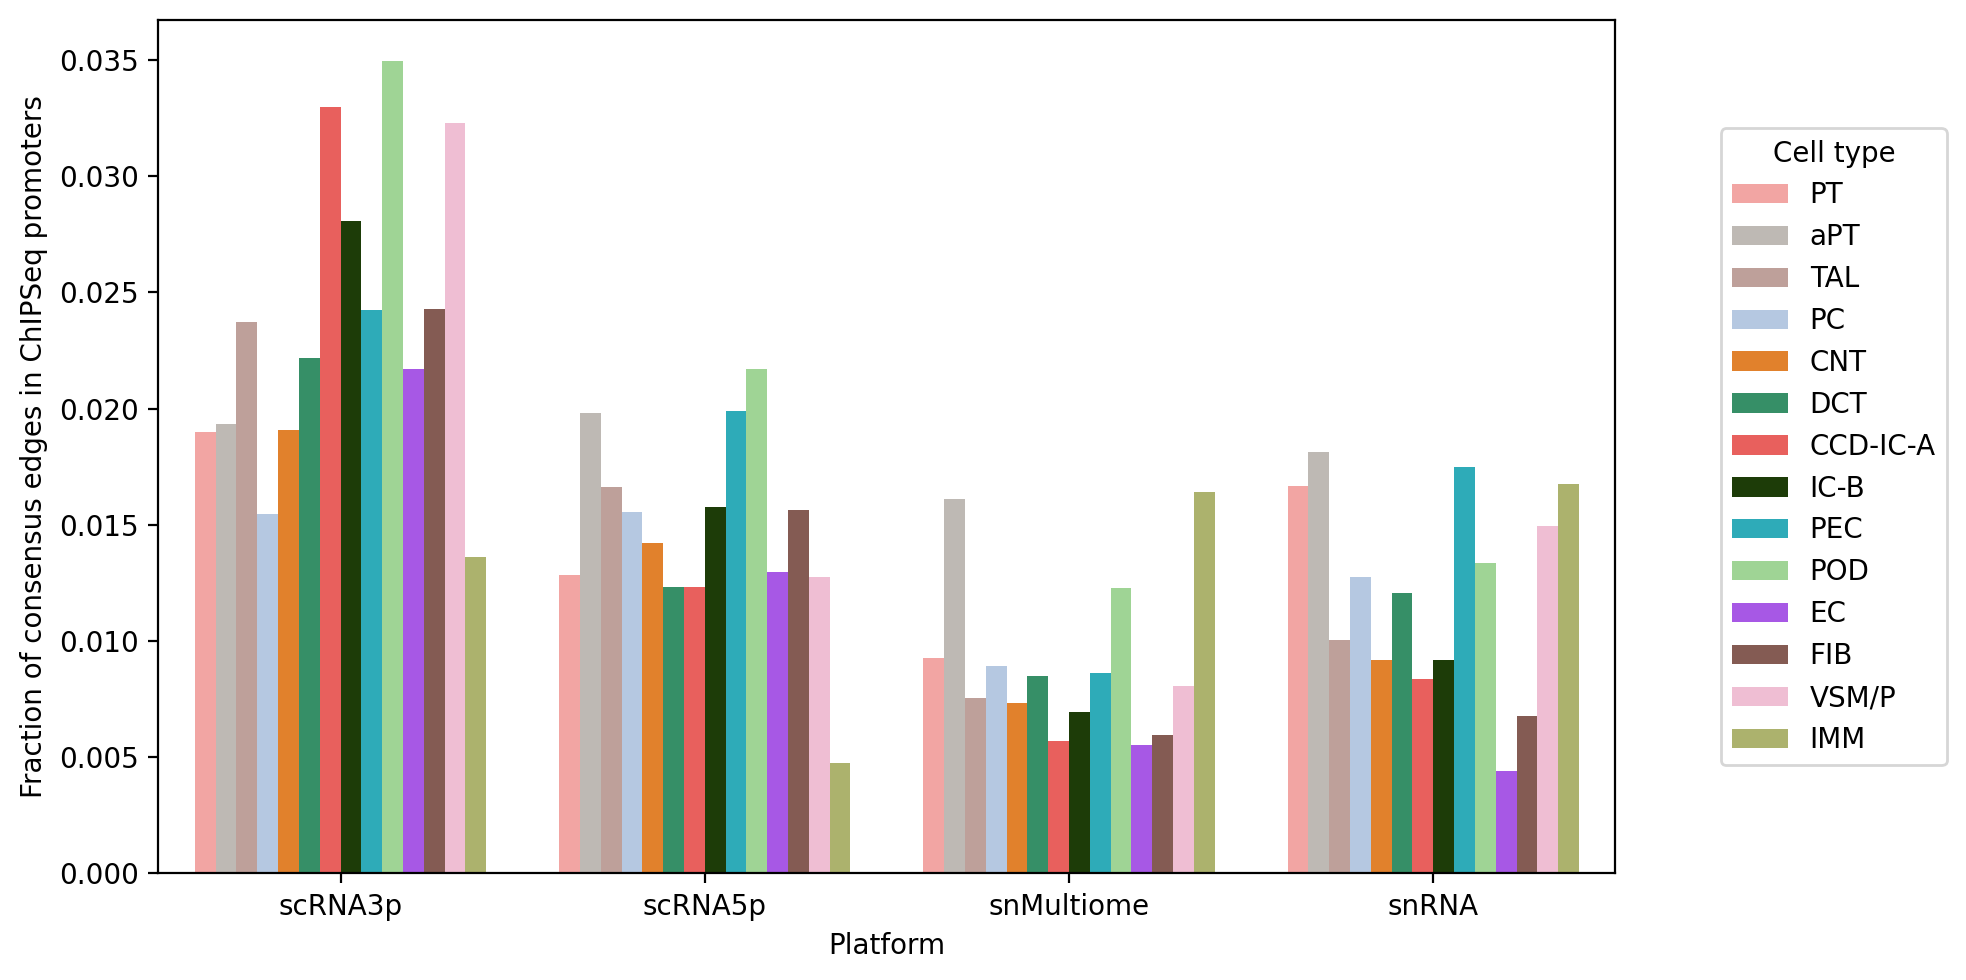

In [75]:
chip_adj = pd.read_pickle(CHIPATLAS_PATH)
chip_adj.columns = ['tf','target']
chip_adj = chip_adj.set_index(['tf','target'])

robust_edges = (abs(grns)>=CORRELATION_THRESHOLD).groupby([PLATFORM,'tf','target']).all()
edges_in_chip = robust_edges.join(chip_adj,how='inner').groupby(PLATFORM).sum()
df = edges_in_chip / robust_edges.groupby(PLATFORM).sum()
df = df.melt(ignore_index=False).reset_index()
df['batch'] = df['batch'].astype('category')
df['batch'] = df['batch'].cat.rename_categories(batch_mapper)
df['variable'] = df['variable'].map(name_mapper)

plt.figure(figsize=(10,5))
sns.barplot(data=df,
            x='batch',
            y='value',
            hue='variable',
            hue_order=celltype_order,
            palette=l1_colors)
plt.legend(loc='center',bbox_to_anchor=(1.15,0.5),title='Cell type')
plt.xlabel('Platform')
plt.ylabel('Fraction of consensus edges in ChIPSeq promoters')

plt.tight_layout()
plt.savefig('../figures/fig5a.pdf')
plt.savefig('../figures/fig5a.jpg')

In [68]:
df_ab = df_a.merge(df_b, how='outer', on=['variable'])
df_ab['value_x'].fillna(0)

KeyError: 'variable'

/tmp/ipykernel_39849/529880083.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df, x='batch', y='value',palette=batch_color, linewidth=1, cut=0)


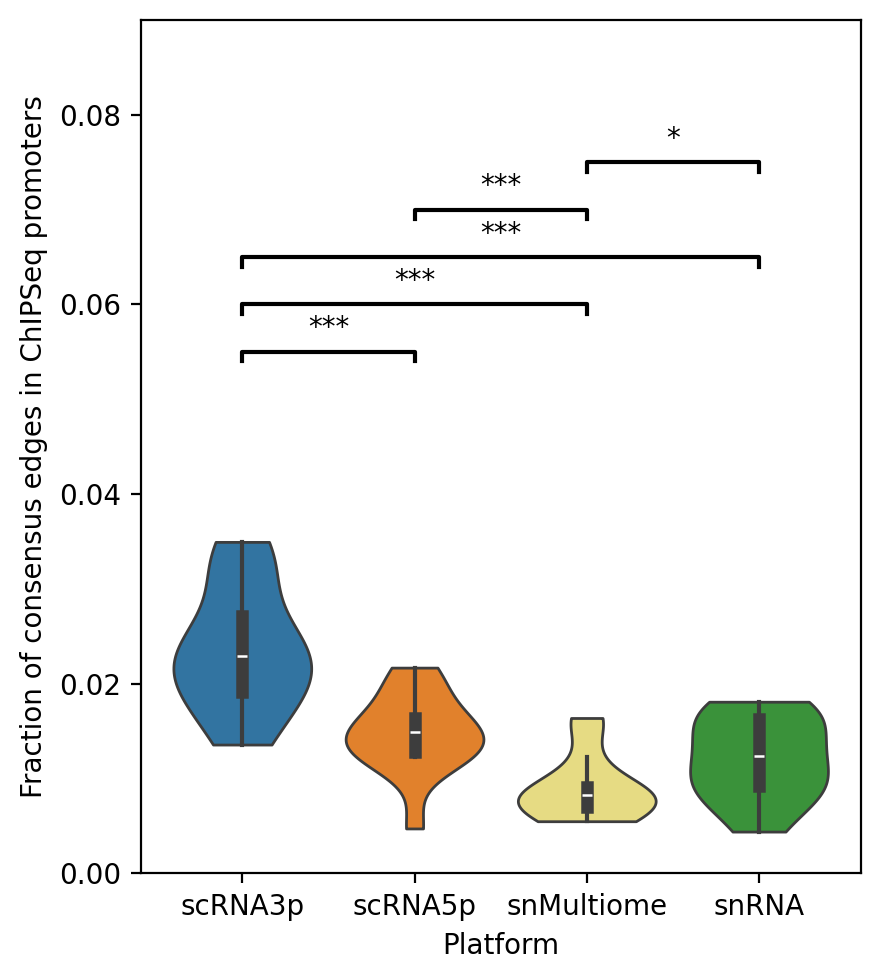

In [ ]:
from scipy.stats import ttest_ind
import itertools as it
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4.5, 5))
ax = sns.violinplot(data=df, x='batch', y='value',palette=batch_color, linewidth=1, cut=0)
plt.ylabel('Fraction of consensus edges in ChIPSeq promoters')
plt.ylim([0, 0.07])  # Adjusted to fit annotations
plt.xlabel('Platform')

df['variable'] = df['variable'].astype('str')

# Perform pairwise t-tests and store results
result = {}
for (a, b) in it.combinations(df['batch'].unique(), 2):
    df_a = df.query(f'batch == "{a}"')
    df_b = df.query(f'batch == "{b}"')
    df_ab = df_a.merge(df_b, how='outer', on=['variable'])
    df_ab['value_x'] = df_ab['value_x'].fillna(0)
    df_ab['value_y'] = df_ab['value_y'].fillna(0)
    t_stat, p_val = ttest_ind(df_ab['value_x'], df_ab['value_y'])
    result[(a, b)] = p_val

# Add statistical significance annotations based on p-values
y_pos = 0.055  # Starting position for annotations
for (a, b), p_val in result.items():
    x1, x2 = sorted([df['batch'].unique().tolist().index(a), df['batch'].unique().tolist().index(b)])
    if p_val < 0.05:
        text = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*'
        plt.plot([x1, x1, x2, x2], [y_pos - 0.001, y_pos, y_pos, y_pos - 0.001], color='black')
        plt.text((x1 + x2) * 0.5, y_pos + 0.001, text, ha='center', va='bottom')
        y_pos += 0.005  # Increment y position for the next annotation

plt.ylim(0, y_pos + 0.01)  # Extend ylim to fit all annotations
# plt.show()

plt.tight_layout()
plt.savefig('../figures/fig5b.pdf')
plt.savefig('../figures/fig5b.jpg')

In [ ]:
df_chip = edges_in_chip
df_chip['sum'] = df_chip.sum(axis=1)
df_chip

,CNT,DCT,ENDO,ICA,LEUK,MES,PC,PEC,PODO,PT,TAL,aPT,FIB,ICB,sum
batch,,,,,,,,,,,,,,,
scRNA,16,22,23,16,7,27,20,36,10,13,34,19,27,11,281
scRNA5p,28,28,24,20,11,15,43,30,14,3,36,32,21,23,328
snMultiome,8,6,7,8,8,9,10,17,21,8,8,25,6,6,147
snRNA,8,8,4,10,8,17,13,27,23,15,8,27,7,7,182


In [ ]:
df_robust = robust_edges.groupby(PLATFORM).sum()
df_robust['sum'] = df_robust.sum(axis=1)
df_robust

,CNT,DCT,ENDO,ICA,LEUK,MES,PC,PEC,PODO,PT,TAL,aPT,FIB,ICB,sum
batch,,,,,,,,,,,,,,,
scRNA,839,992,1059,485,515,836,1294,1485,286,684,1432,983,1112,392,12394
scRNA5p,1969,2274,1852,1625,2318,1176,2769,1509,645,234,2165,1616,1342,1461,22955
snMultiome,1092,706,1271,1405,488,1117,1120,1976,1712,865,1057,1553,1009,866,16237
snRNA,870,663,906,1196,477,1138,1020,1543,1723,899,797,1491,1034,763,14520


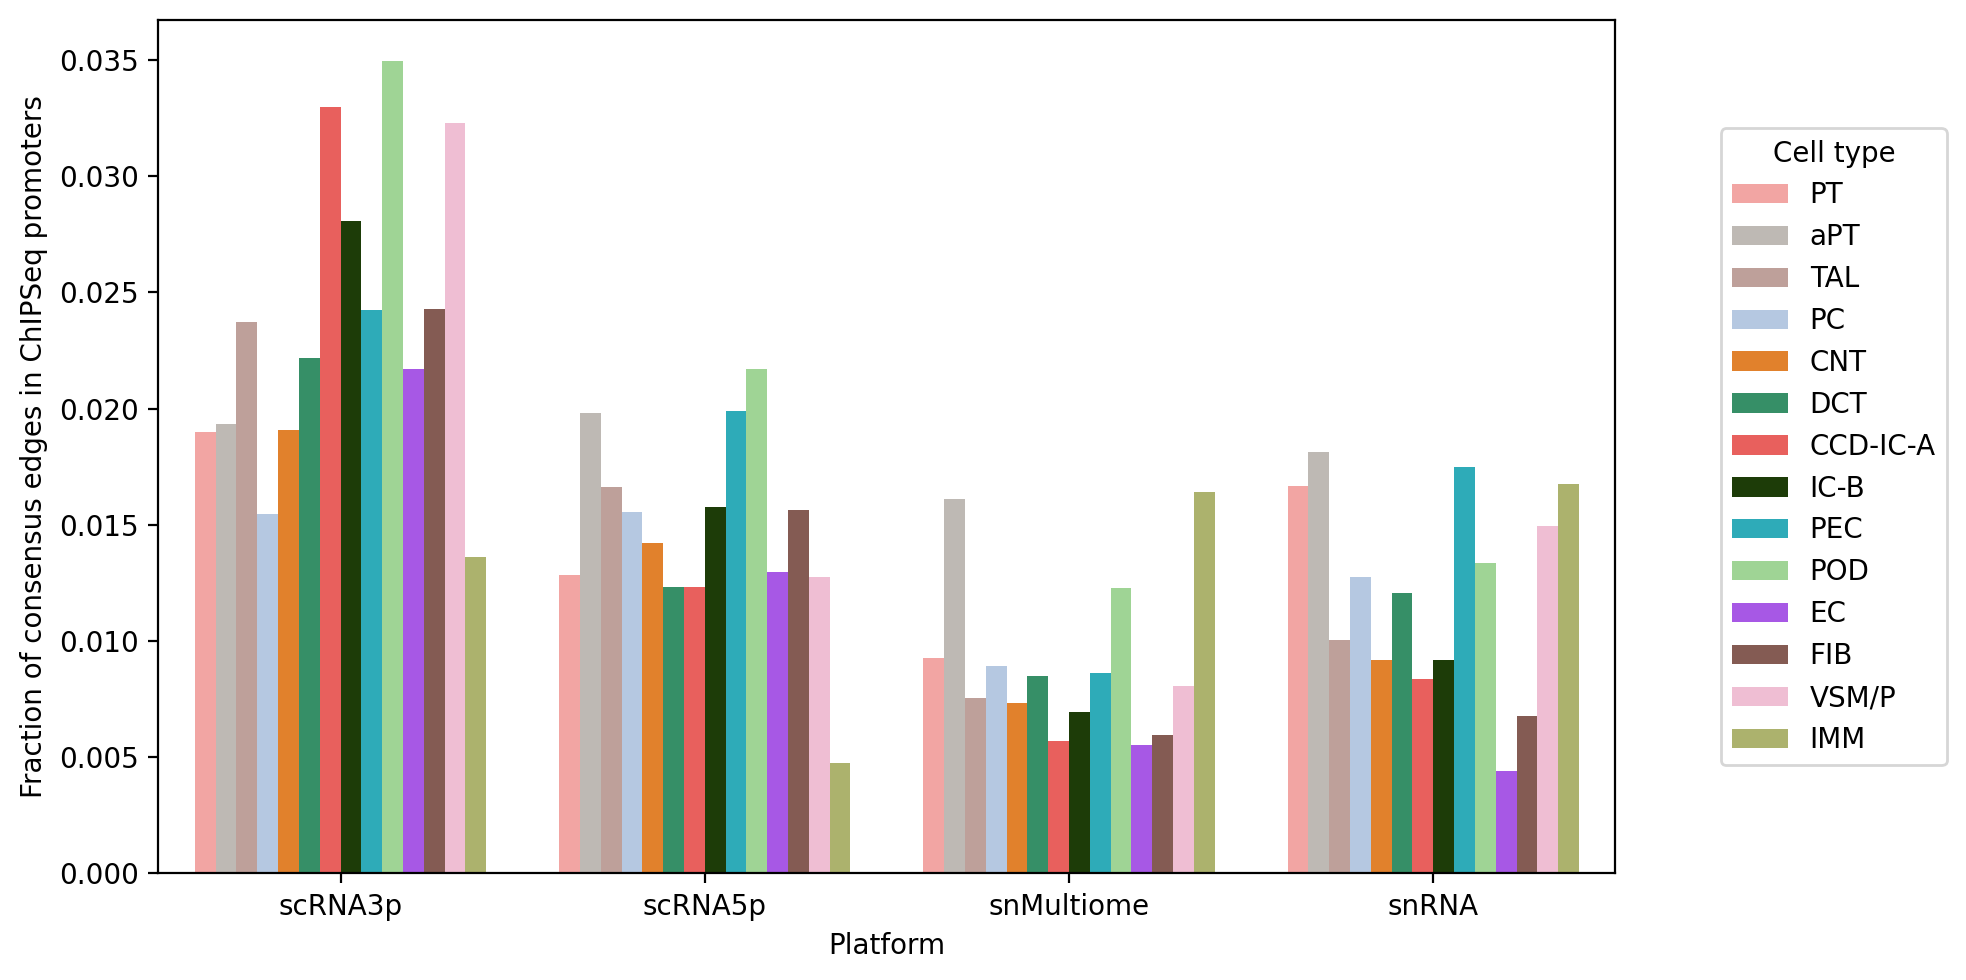

In [ ]:
chip_adj = pd.read_pickle(CHIPATLAS_PATH)
chip_adj.columns = ['tf','target']
chip_adj = chip_adj.set_index(['tf','target'])

robust_edges = (abs(grns)>=CORRELATION_THRESHOLD).groupby([PLATFORM,'tf','target']).all()
edges_in_chip = robust_edges.join(chip_adj,how='inner').groupby(PLATFORM).sum()
df = edges_in_chip / robust_edges.groupby(PLATFORM).sum()
df = df.melt(ignore_index=False).reset_index()

df['batch'] = df['batch'].astype('category')
df['batch'] = df['batch'].cat.rename_categories(batch_mapper)
df['variable'] = df['variable'].map(name_mapper)

plt.figure(figsize=(10,5))
sns.barplot(data=df,
            x='batch',
            y='value',
            hue='variable',
            hue_order=celltype_order,
            palette=l1_colors)
plt.legend(loc='center',bbox_to_anchor=(1.15,0.5),title='Cell type')
plt.xlabel('Platform')
plt.ylabel('Fraction of consensus edges in ChIPSeq promoters')

plt.tight_layout()
plt.savefig('../figures/fig5a.pdf')
plt.savefig('../figures/fig5a.jpg')

/tmp/ipykernel_39849/1586121955.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df, x='batch', y='value', palette=batch_color, linewidth=1, cut=0)


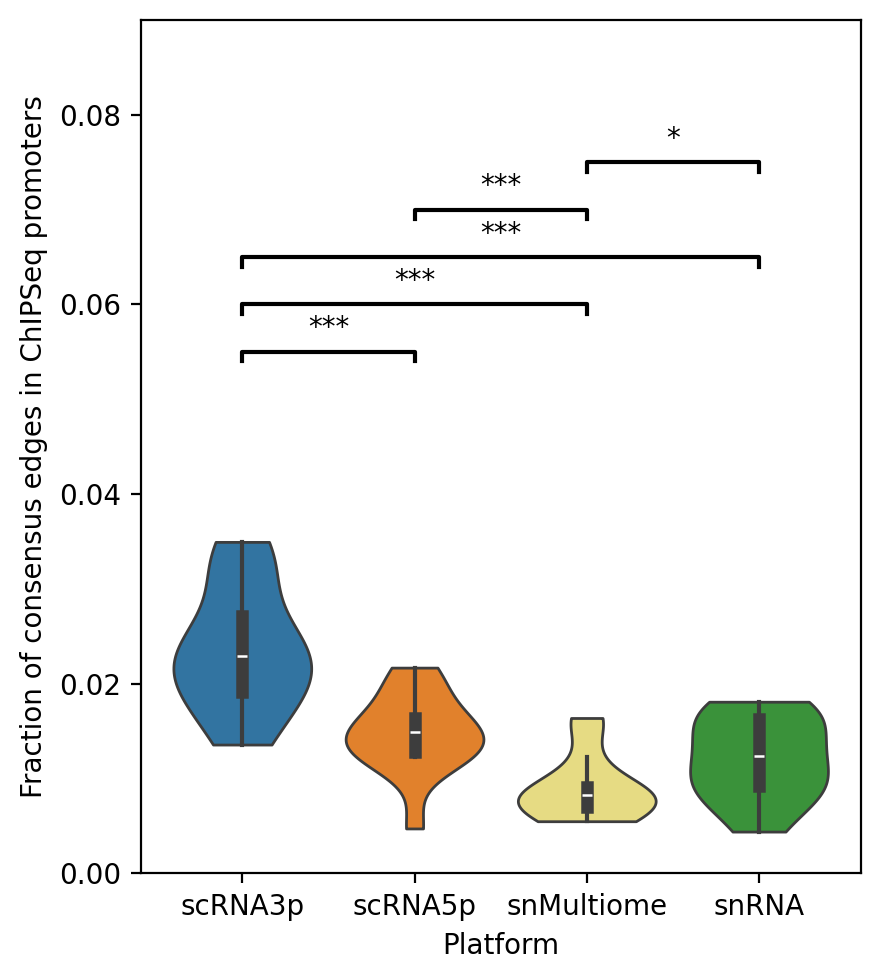

In [ ]:
from scipy.stats import ttest_ind
import itertools as it
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(4.5, 5))
ax = sns.violinplot(data=df, x='batch', y='value', palette=batch_color, linewidth=1, cut=0)
plt.ylabel('Fraction of consensus TFs with HPA evidence')
plt.ylim([0, 0.07])  # Adjusted to fit annotations
plt.xlabel('Platform')

# Perform pairwise t-tests and store results
result = {}
for (a, b) in it.combinations(df['batch'].unique(), 2):
    df_a = df.query(f'batch == "{a}"')
    df_b = df.query(f'batch == "{b}"')
    df_ab = df_a.merge(df_b, how='outer', on=['variable'])
    df_ab['value_x'] = df_ab['value_x'].fillna(0)
    df_ab['value_y'] = df_ab['value_y'].fillna(0)
    t_stat, p_val = ttest_ind(df_ab['value_x'], df_ab['value_y'])
    result[(a, b)] = p_val

# Add statistical significance annotations based on p-values
y_pos = 0.055  # Starting position for annotations
for (a, b), p_val in result.items():
    x1, x2 = sorted([df['batch'].unique().tolist().index(a), df['batch'].unique().tolist().index(b)])
    if p_val < 0.05:
        text = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*'
        plt.plot([x1, x1, x2, x2], [y_pos - 0.001, y_pos, y_pos, y_pos - 0.001], color='black')
        plt.text((x1 + x2) * 0.5, y_pos + 0.001, text, ha='center', va='bottom')
        y_pos += 0.005  # Increment y position for the next annotation

plt.ylim(0, y_pos + 0.01)  # Extend ylim to fit all annotations
# plt.show()

plt.tight_layout()
plt.savefig('../figures/fig5b_v2.pdf')
plt.savefig('../figures/fig5b_v2.jpg')

In [ ]:
dict(df_robust['sum'])

{'scRNA': 12394, 'scRNA5p': 22955, 'snMultiome': 16237, 'snRNA': 14520}

/tmp/ipykernel_45745/2543601469.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df, x='batch', y='value', palette=batch_color, linewidth=1, cut=0)


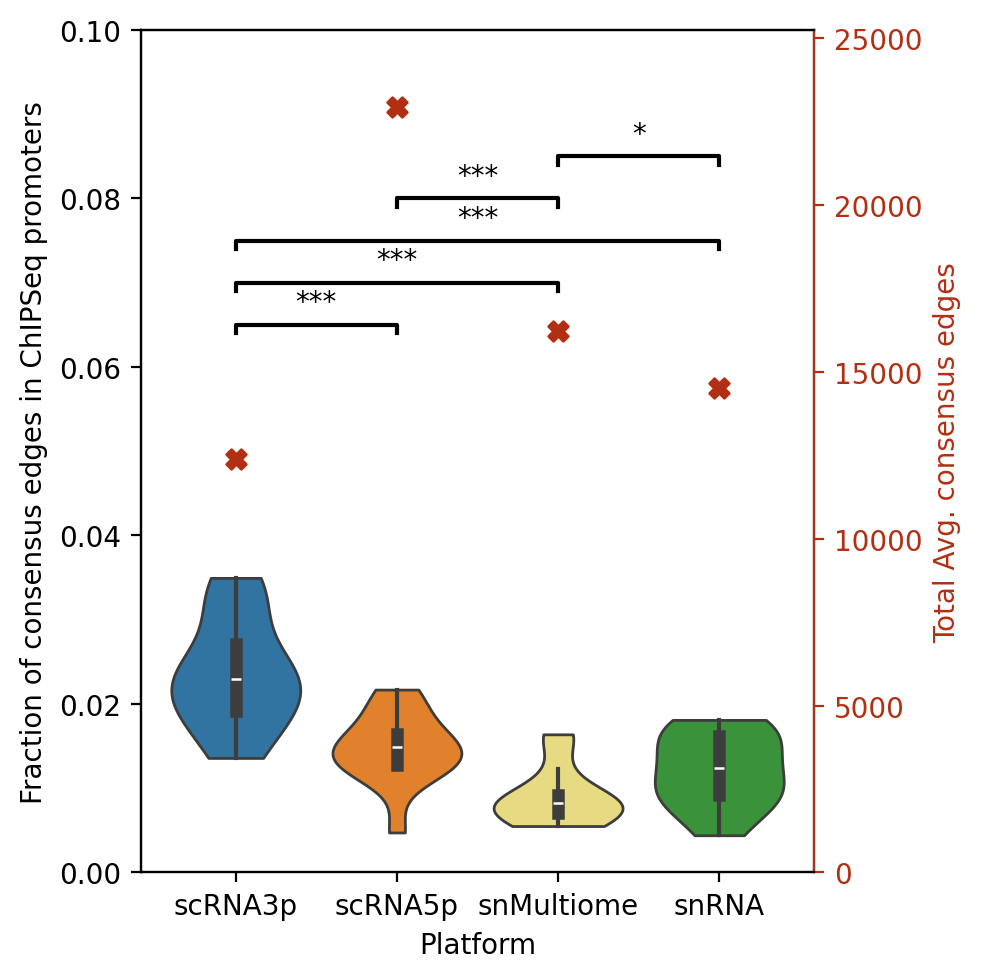

In [79]:
from scipy.stats import ttest_ind
import itertools as it
import matplotlib.pyplot as plt
import seaborn as sns

total_tfs = {'scRNA3p': 12394, 'scRNA5p': 22955, 'snMultiome': 16237, 'snRNA': 14520}

plt.figure(figsize=(5, 5))
ax = sns.violinplot(data=df, x='batch', y='value', palette=batch_color, linewidth=1, cut=0)
plt.ylabel('Fraction of consensus edges in ChIPSeq promoters')
plt.ylim([0, 0.07])  # Adjusted to fit annotations
plt.xlabel('Platform')

# Perform pairwise t-tests and store results
result = {}
for (a, b) in it.combinations(df['batch'].unique(), 2):
    df_a = df.query(f'batch == "{a}"')
    df_b = df.query(f'batch == "{b}"')
    df_ab = df_a.merge(df_b, how='outer', on=['variable'])
    df_ab['value_x'] = df_ab['value_x'].fillna(0)
    df_ab['value_y'] = df_ab['value_y'].fillna(0)
    t_stat, p_val = ttest_ind(df_ab['value_x'], df_ab['value_y'])
    result[(a, b)] = p_val

# Add statistical significance annotations based on p-values
y_pos = 0.065  # Starting position for annotations
for (a, b), p_val in result.items():
    x1, x2 = sorted([df['batch'].unique().tolist().index(a), df['batch'].unique().tolist().index(b)])
    if p_val < 0.05:
        text = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*'
        plt.plot([x1, x1, x2, x2], [y_pos - 0.001, y_pos, y_pos, y_pos - 0.001], color='black')
        plt.text((x1 + x2) * 0.5, y_pos + 0.001, text, ha='center', va='bottom')
        y_pos += 0.005  # Increment y position for the next annotation

ax.set_ylim(0, y_pos + 0.01)  # Extend ylim to fit all annotations
secondary_axis_color='#B22F13'
# Add secondary y-axis for total TF counts
ax2 = ax.twinx()
ax2.set_ylim(0, max(total_tfs.values()) * 1.1)  # Scale secondary axis
ax2.tick_params(axis='y', colors=secondary_axis_color)  # Set tick color
ax2.spines['right'].set_color(secondary_axis_color)  # Set axis spine color
ax2.set_ylabel('Total Avg. consensus edges', color = secondary_axis_color)

# Add symbols for total TF counts
for i, batch in enumerate(df['batch'].unique()):
    tf_count = total_tfs[batch]
    ax2.scatter(i,tf_count, color=secondary_axis_color, s=50, zorder=3, marker='X',label=None)  # Symbol for total TF count
    # ax.text(i, 0.067, f"{tf_count}", color=secondary_axis_color, ha='center', va='bottom', fontsize=10)  # Annotation

# Label the secondary y-axis
plt.tight_layout()
plt.savefig('../figures/fig5b_v1.pdf')
plt.savefig('../figures/fig5b_v1.jpg')
plt.savefig('../figures/fig5b_v1.png')

In [128]:
df_robust

,CNT,DCT,ENDO,ICA,LEUK,MES,PC,PEC,PODO,PT,TAL,aPT,FIB,ICB,sum
batch,,,,,,,,,,,,,,,
scRNA,839,992,1059,485,515,836,1294,1485,286,684,1432,983,1112,392,12394
scRNA5p,1969,2274,1852,1625,2318,1176,2769,1509,645,234,2165,1616,1342,1461,22955
snMultiome,1092,706,1271,1405,488,1117,1120,1976,1712,865,1057,1553,1009,866,16237
snRNA,870,663,906,1196,477,1138,1020,1543,1723,899,797,1491,1034,763,14520


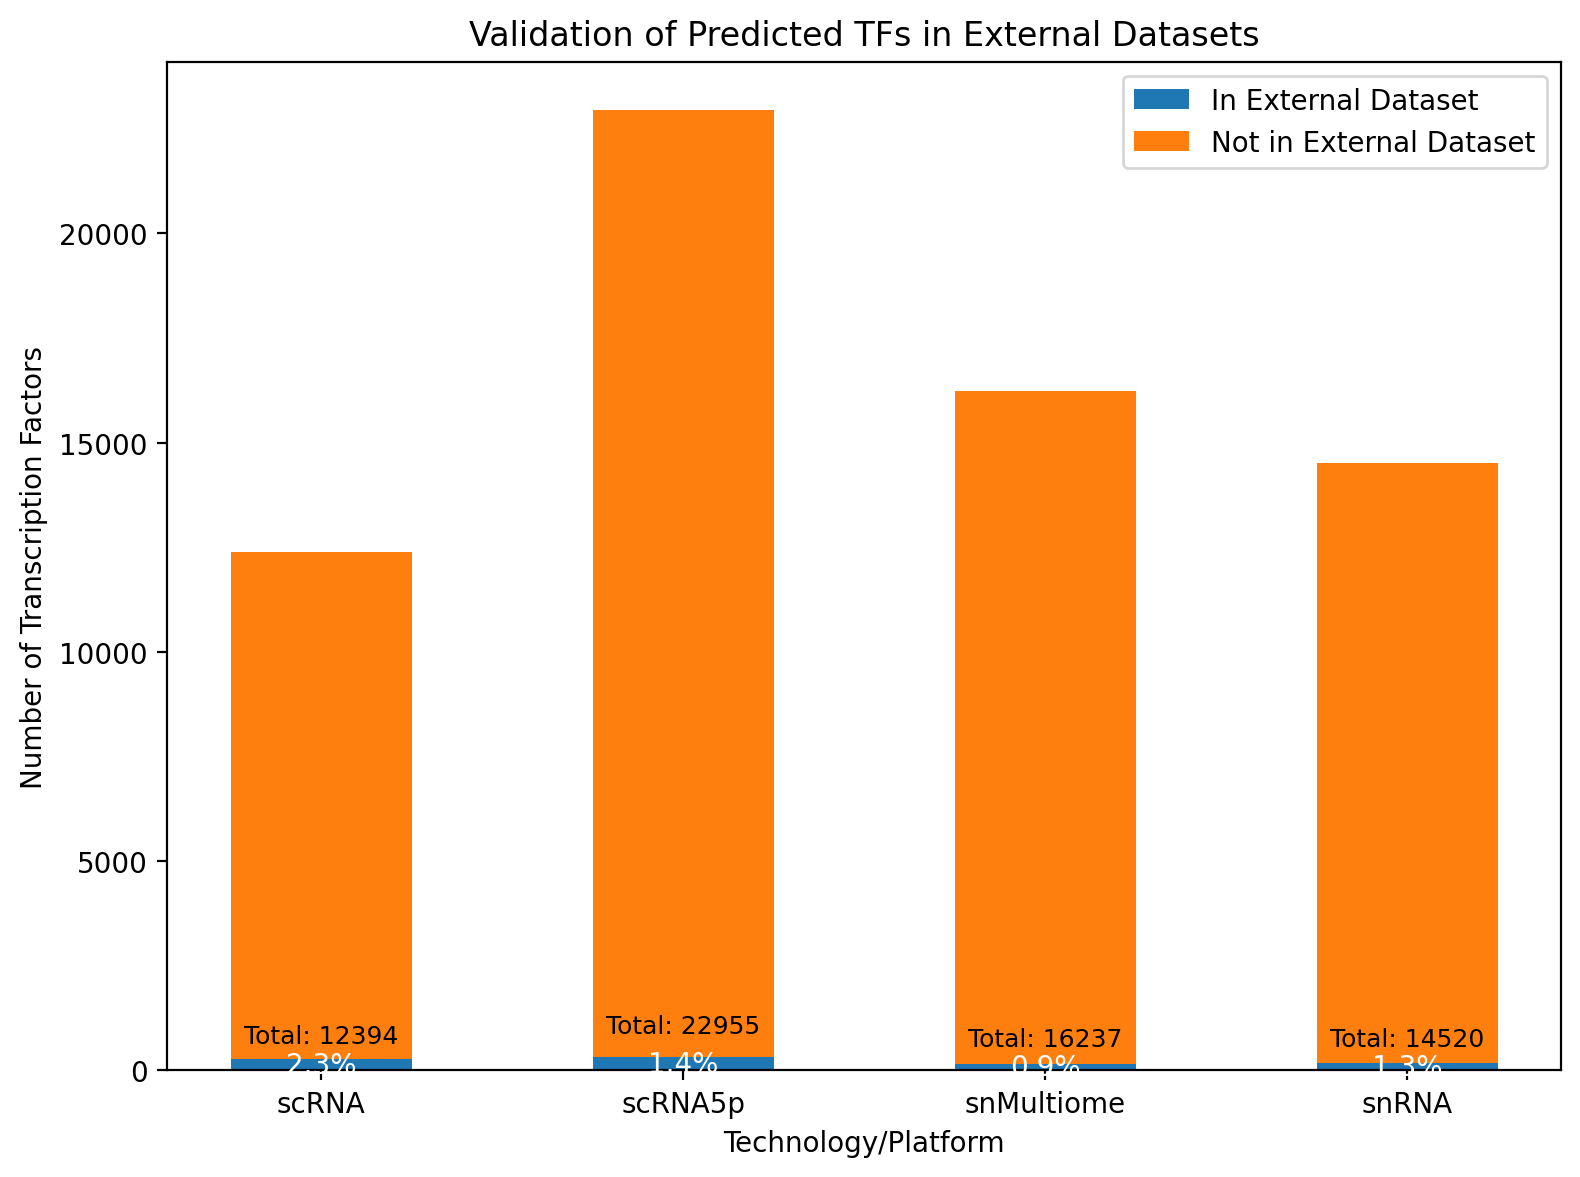

In [129]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
technologies = df_robust.index
total_tfs = df_robust['sum']
tfs_in_external = df_chip['sum']
# Calculate not in external and percentages
tfs_not_in_external = [total - found for total, found in zip(total_tfs, tfs_in_external)]
percentages = [100 * found / total for found, total in zip(tfs_in_external, total_tfs)]

# Bar plot
x = np.arange(len(technologies))
width = 0.5
fig, ax = plt.subplots(figsize=(8, 6))

bars1 = ax.bar(x, tfs_in_external, width, label='In External Dataset')
bars2 = ax.bar(x, tfs_not_in_external, width, bottom=tfs_in_external, label='Not in External Dataset')

# Add annotations
for bar, percent, total in zip(bars1, percentages, total_tfs):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2,
            f"{percent:.1f}%", ha='center', va='center', color='white', fontsize=10)
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + total * 0.02,
            f"Total: {total}", ha='center', va='bottom', fontsize=9)

# Formatting
ax.set_xlabel('Technology/Platform')
ax.set_ylabel('Number of Transcription Factors')
ax.set_title('Validation of Predicted TFs in External Datasets')
ax.set_xticks(x)
ax.set_xticklabels(technologies)
ax.legend()

plt.tight_layout()
plt.show()
